<a href="https://colab.research.google.com/github/Jyothsna2004/Solar-Power-estimation/blob/main/solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import standard libraries
import numpy as np
import pandas as pd
from scipy import stats  # You may remove this if unused later

# Import visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
# %matplotlib inline  # Uncomment only if using Jupyter Notebook

# Time-Series Metrics
# from sklearn.model_selection import TimeSeriesSplit  # Keep if you'll use it
from sklearn.metrics import mean_squared_error

# Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Facebook Prophet
from prophet import Prophet

# Utility
import itertools
import warnings
warnings.filterwarnings('ignore')

# Display Settings
pd.options.display.max_columns = None
pd.options.display.width = None

# Optional: Set seaborn style
sns.set(style="whitegrid")


In [ ]:
full_solar_df = \
pd.read_csv('Net_generation_for_all_utility-scale_solar.csv',
            skiprows=4)

full_solar_df.head()

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,Feb 2004,Mar 2004,Apr 2004,May 2004,Jun 2004,Jul 2004,Aug 2004,Sep 2004,Oct 2004,Nov 2004,Dec 2004,Jan 2005,Feb 2005,Mar 2005,Apr 2005,May 2005,Jun 2005,Jul 2005,Aug 2005,Sep 2005,Oct 2005,Nov 2005,Dec 2005,Jan 2006,Feb 2006,Mar 2006,Apr 2006,May 2006,Jun 2006,Jul 2006,Aug 2006,Sep 2006,Oct 2006,Nov 2006,Dec 2006,Jan 2007,Feb 2007,Mar 2007,Apr 2007,May 2007,Jun 2007,Jul 2007,Aug 2007,Sep 2007,Oct 2007,Nov 2007,Dec 2007,Jan 2008,Feb 2008,Mar 2008,Apr 2008,May 2008,Jun 2008,Jul 2008,Aug 2008,Sep 2008,Oct 2008,Nov 2008,Dec 2008,Jan 2009,Feb 2009,Mar 2009,Apr 2009,May 2009,Jun 2009,Jul 2009,Aug 2009,Sep 2009,Oct 2009,Nov 2009,Dec 2009,Jan 2010,Feb 2010,Mar 2010,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Jan 2021,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022
0,Net generation for all utility-scale solar,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,thousand megawatthours,ELEC.GEN.SUN-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# Reload CSV with clean start
full_solar_df = pd.read_csv('Net_generation_for_all_utility-scale_solar.csv', skiprows=4)

# Keep a copy of original 'description'
full_solar_df['Location'] = full_solar_df['description']

# Show unique locations to pick from
print(full_solar_df['Location'].unique())

['Net generation for all utility-scale solar' 'United States'
 'United States : all sectors' 'United States : electric power'
 'United States : electric utility'
 'United States : independent power producers'
 'United States : all commercial' 'United States : all industrial'
 'New England' 'New England : all sectors' 'New England : electric power'
 'New England : electric utility'
 'New England : independent power producers'
 'New England : all commercial' 'New England : all industrial'
 'Massachusetts' 'Massachusetts : all sectors'
 'Massachusetts : electric power' 'Massachusetts : electric utility'
 'Massachusetts : independent power producers'
 'Massachusetts : all commercial' 'Massachusetts : all industrial'
 'Vermont' 'Vermont : all sectors' 'Vermont : electric power'
 'Vermont : electric utility' 'Vermont : independent power producers'
 'Vermont : all commercial' 'Vermont : all industrial' 'Middle Atlantic'
 'New Jersey' 'New Jersey : all sectors' 'New Jersey : electric power'
 '

In [ ]:
# Filter the specific row for United States : all sectors
us_row = full_solar_df[full_solar_df['Location'] == 'United States : all sectors']

# Drop unnecessary columns
us_series = us_row.drop(columns=['description', 'Location', 'units', 'source key']).T

# Rename and format
us_series.columns = ['Solar Output']
us_series.index = pd.to_datetime(us_series.index, format='%b %Y')
us_series = us_series.dropna()

# Check the result
print(us_series.head())

           Solar Output
2001-01-01            7
2001-02-01           13
2001-03-01           31
2001-04-01           39
2001-05-01           81


In [ ]:
# Filter correct row and drop non-date columns
us_solar_df = full_solar_df[full_solar_df['Location'] == "United States : all sectors"]\
    .drop(['Location', 'units', 'source key'], axis=1)

# Transpose the data
us_solar_df = us_solar_df.T

# Fix the column name
us_solar_df.columns = ['Solar Output']

# Drop any non-date rows (like 'description') automatically using try-except
us_solar_df = us_solar_df[~us_solar_df.index.isin(['description'])]

# Convert the index to datetime
us_solar_df.index = pd.to_datetime(us_solar_df.index, format='%b %Y')

# Drop missing values
us_solar_df = us_solar_df.dropna()

In [ ]:
us_solar_df.index = pd.to_datetime(us_solar_df.index, format="%b %Y")

In [ ]:
us_solar_df.rename(columns={0: 'Solar Output (tmwh)'}, inplace=True)

In [ ]:
print(us_solar_df.columns)

Index(['Solar Output'], dtype='object')


In [ ]:
us_solar_df['Solar Output'] = pd.to_numeric(us_solar_df['Solar Output'], errors='coerce')

In [ ]:
us_solar_df = us_solar_df.dropna()

In [ ]:
print(us_solar_df.isna().sum())

Solar Output    0
dtype: int64


In [ ]:
us_solar_df.value_counts().head(10)  # ✅ OK

,count
Solar Output,
13,7
75,4
4,3
62,3
68,3
11,2
33,2
21,2
7,2


In [ ]:
us_solar_df.rename(columns={'Solar Output': 'Solar Output (tmwh)'}, inplace=True)

In [ ]:
us_solar_df['Solar Output (tmwh)'].replace(to_replace='--', value=0, inplace=True)

In [ ]:
us_solar_df['Solar Output (tmwh)'].replace(to_replace='--', value=0, inplace=True)

In [ ]:
#Check to see if we now have zeros instead of hyphens
us_solar_df['Solar Output (tmwh)']

,Solar Output (tmwh)
2001-01-01,7
2001-02-01,13
2001-03-01,31
2001-04-01,39
2001-05-01,81
...,...
2022-08-01,14442
2022-09-01,13504
2022-10-01,12252
2022-11-01,8484


In [ ]:
#Changing our Solar Output column into integer datatypes
us_solar_df['Solar Output (tmwh)'] = us_solar_df['Solar Output (tmwh)'].astype(int)

In [ ]:
#View our fully transformed dataframe
us_solar_df

,Solar Output (tmwh)
2001-01-01,7
2001-02-01,13
2001-03-01,31
2001-04-01,39
2001-05-01,81
...,...
2022-08-01,14442
2022-09-01,13504
2022-10-01,12252
2022-11-01,8484


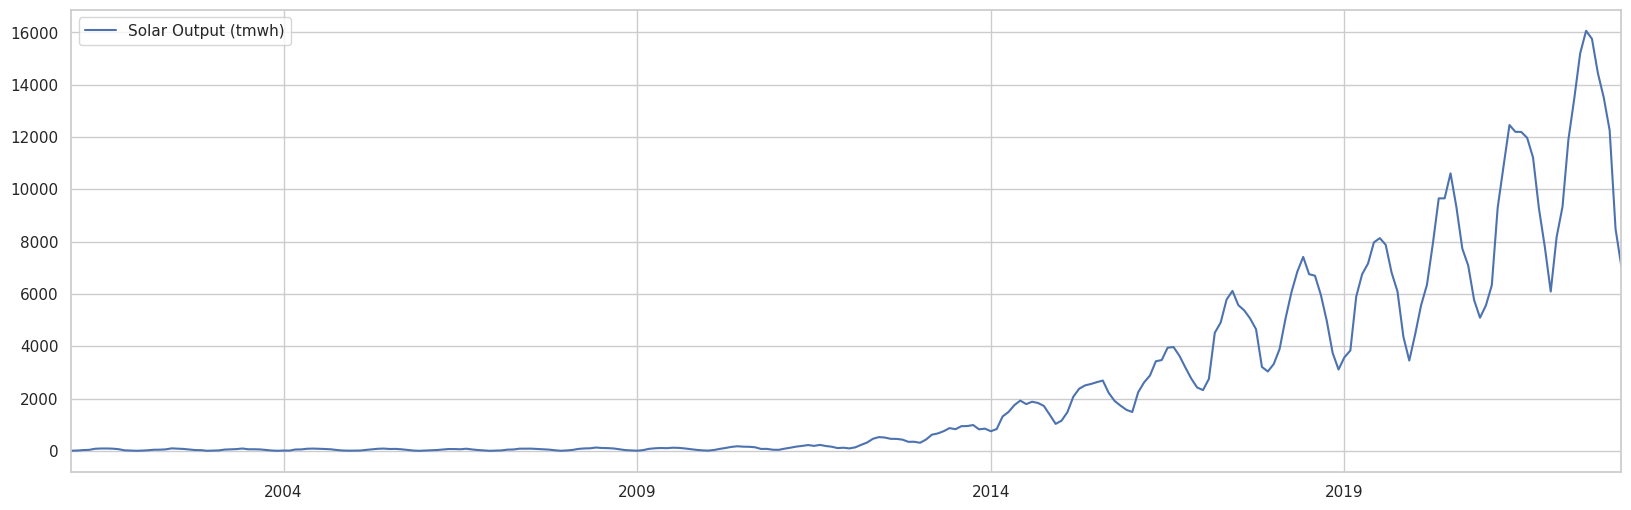

In [ ]:
# Let's plot our new dataframe to see what our data looks like
us_solar_df.plot(figsize = (20,6));

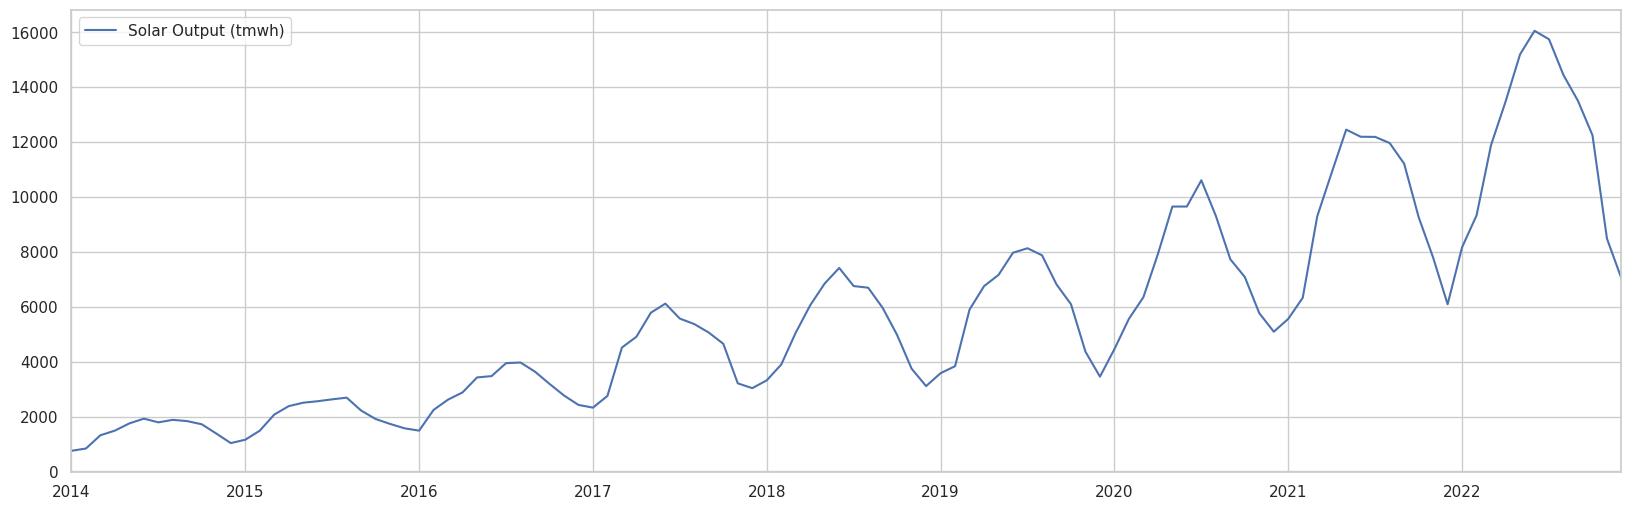

In [ ]:
#New dataframe limited to Jan 2014 and afterwards.
us_solar_df = us_solar_df.loc['2014-01-01':]

#Plot our data
us_solar_df.plot(figsize = (20,6));

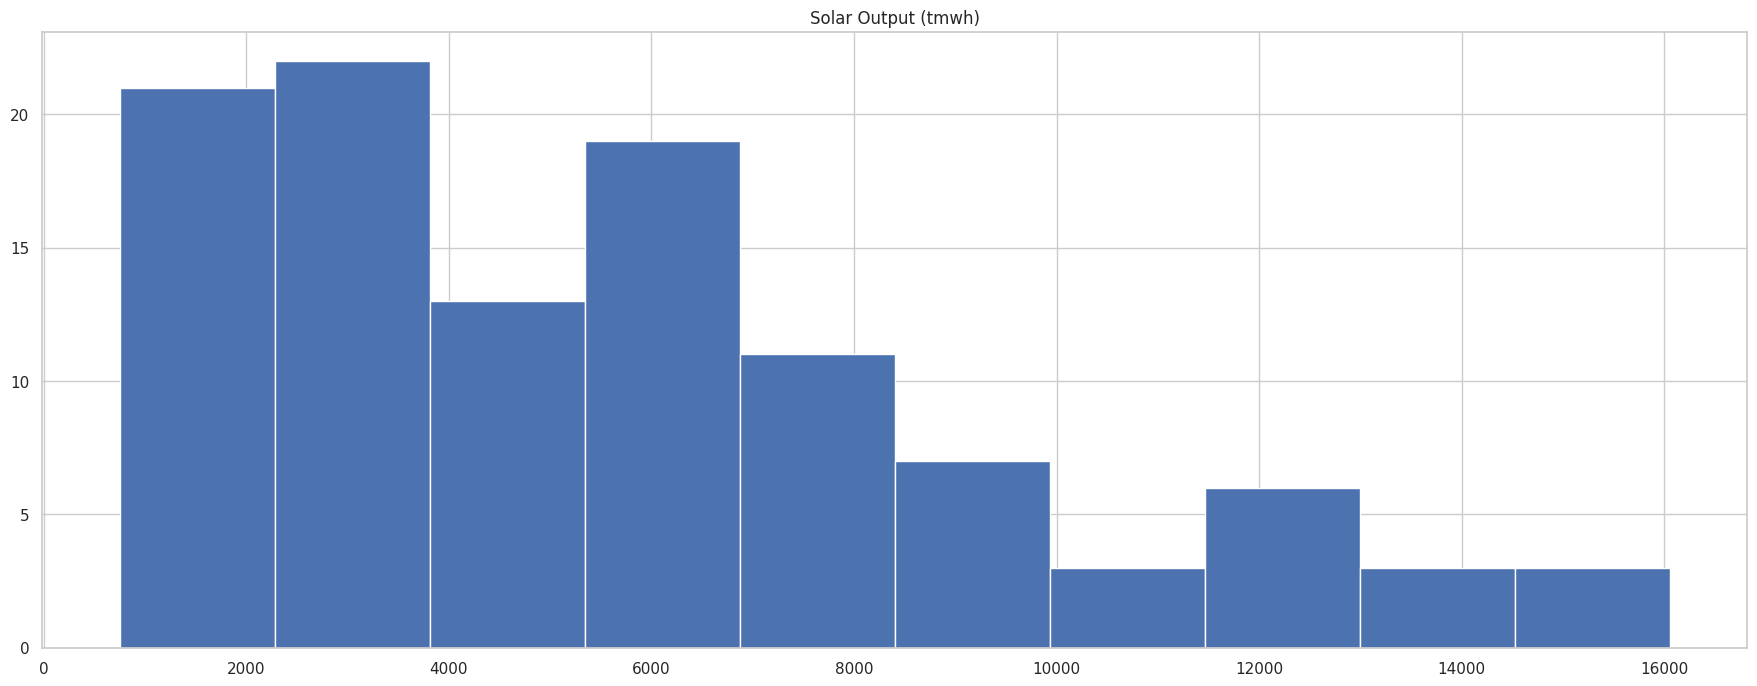

In [ ]:
# Plot a histogram for US Solar dataset
us_solar_df.hist(figsize = (22,8), bins= 10);

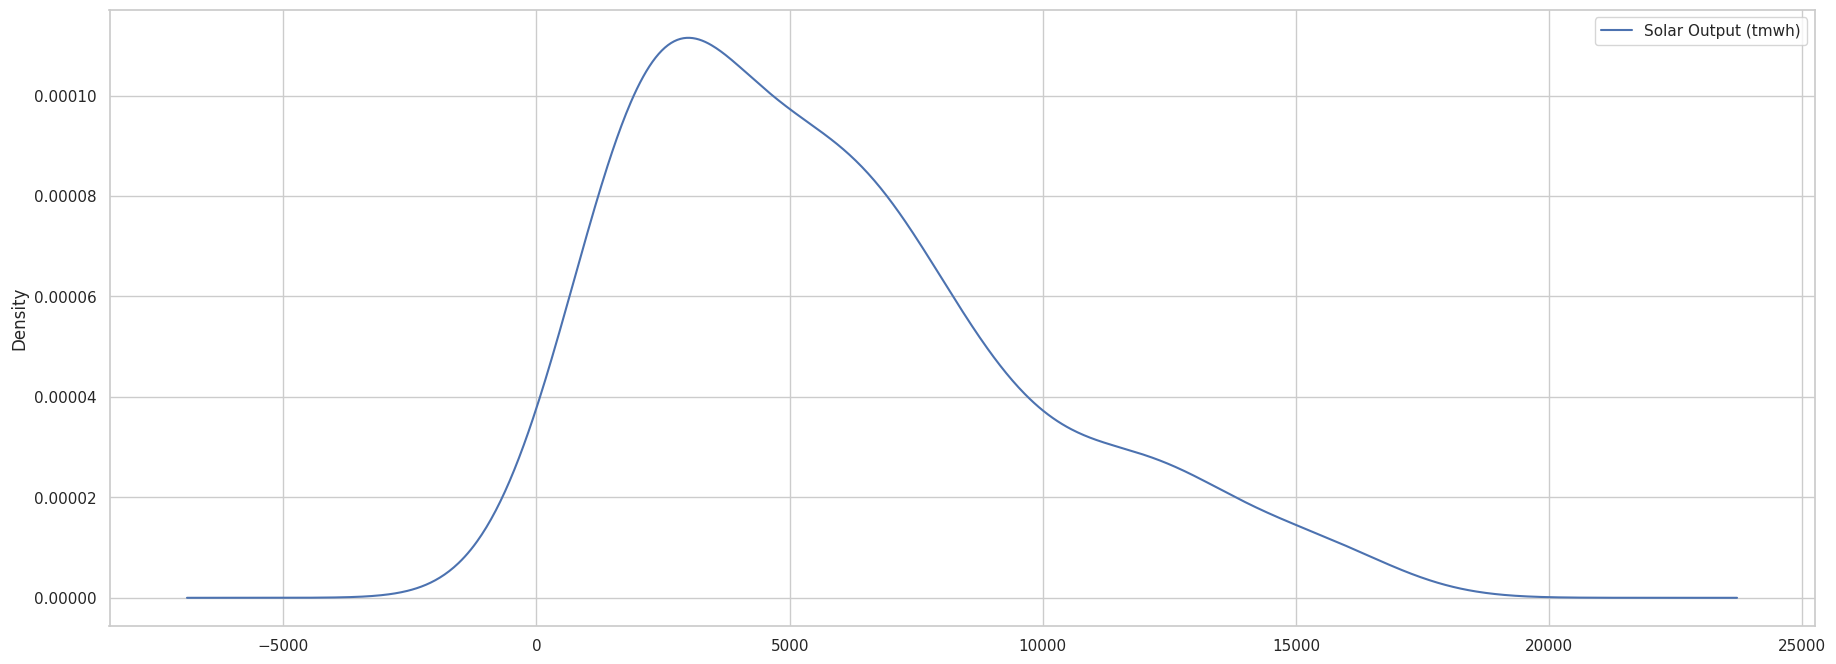

In [ ]:
# Plot a density plot for US Solar dataset
us_solar_df.plot(figsize = (22,8), kind='kde');

In [ ]:
#Group by year
us_year_groups = us_solar_df.groupby(pd.Grouper(freq ='Y'))

# Create a new DataFrame and store yearly values in columns
us_solar_annual = pd.DataFrame()

#Put year groups into new dataframe
for yr, group in us_year_groups:
    us_solar_annual[yr.year] = group.values.ravel()

# Preview new dataframe
us_solar_annual.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,751,1155,1486,2324,3319,3580,4459,5559,8171
1,835,1484,2242,2751,3896,3836,5561,6330,9333
2,1317,2072,2617,4514,5056,5899,6350,9296,11898
3,1487,2379,2880,4907,6057,6752,7921,10892,13476
4,1750,2504,3425,5785,6849,7162,9653,12457,15198


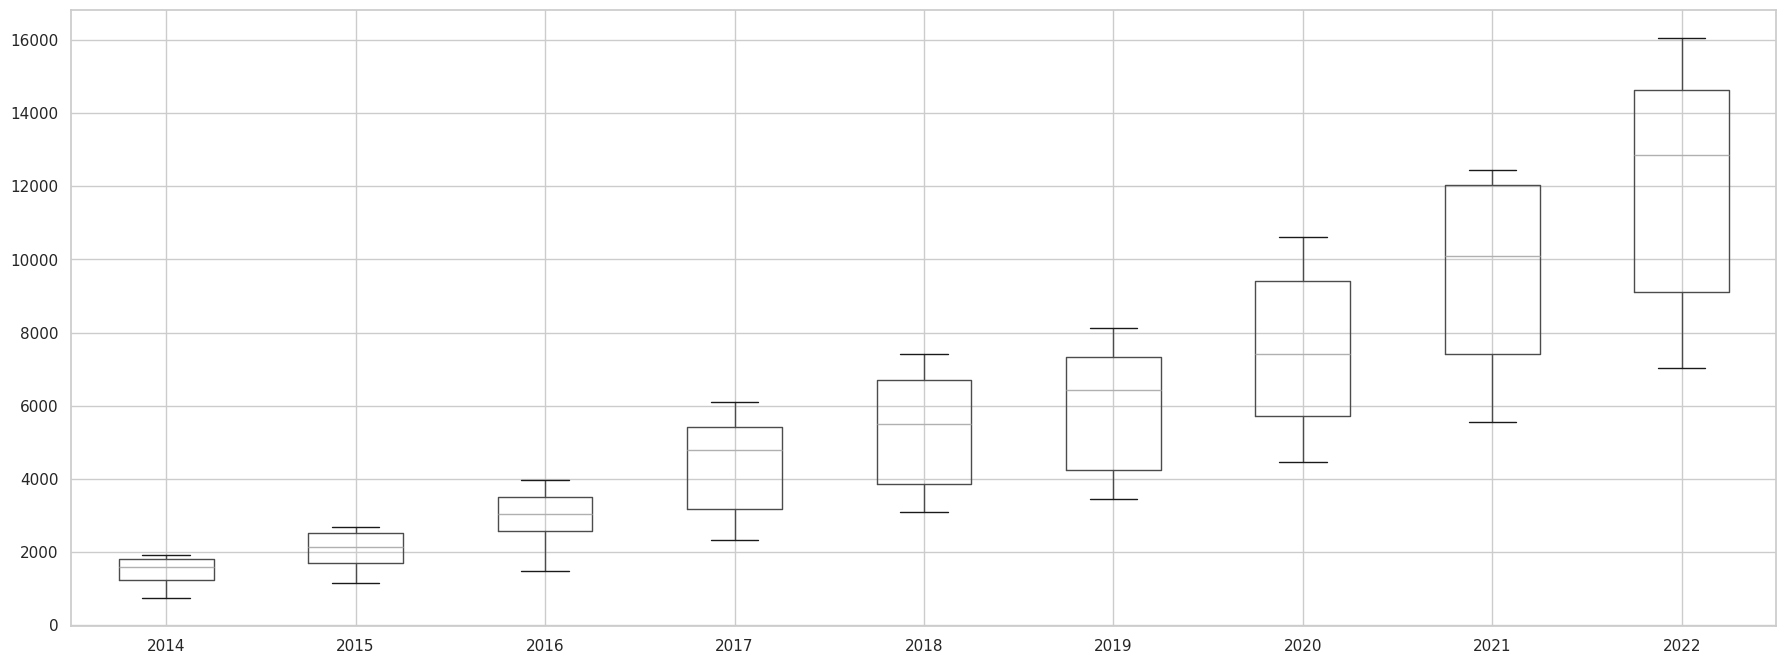

In [ ]:
# Generate a box and whiskers plot for us_solar_annual
us_solar_annual.boxplot(figsize = (22,8));

In [ ]:
#Create a new month dataframe
monthly_trends_df = us_solar_df.copy()

#Create columns with containg month and year
monthly_trends_df['Month'] = monthly_trends_df.index.month
monthly_trends_df['Year'] = monthly_trends_df.index.year

In [ ]:
#Convert Month from number to three letter abbreviation
monthly_trends_df['Month'] =\
pd.to_datetime(monthly_trends_df['Month'], format='%m').dt.month_name().str.slice(stop=3)

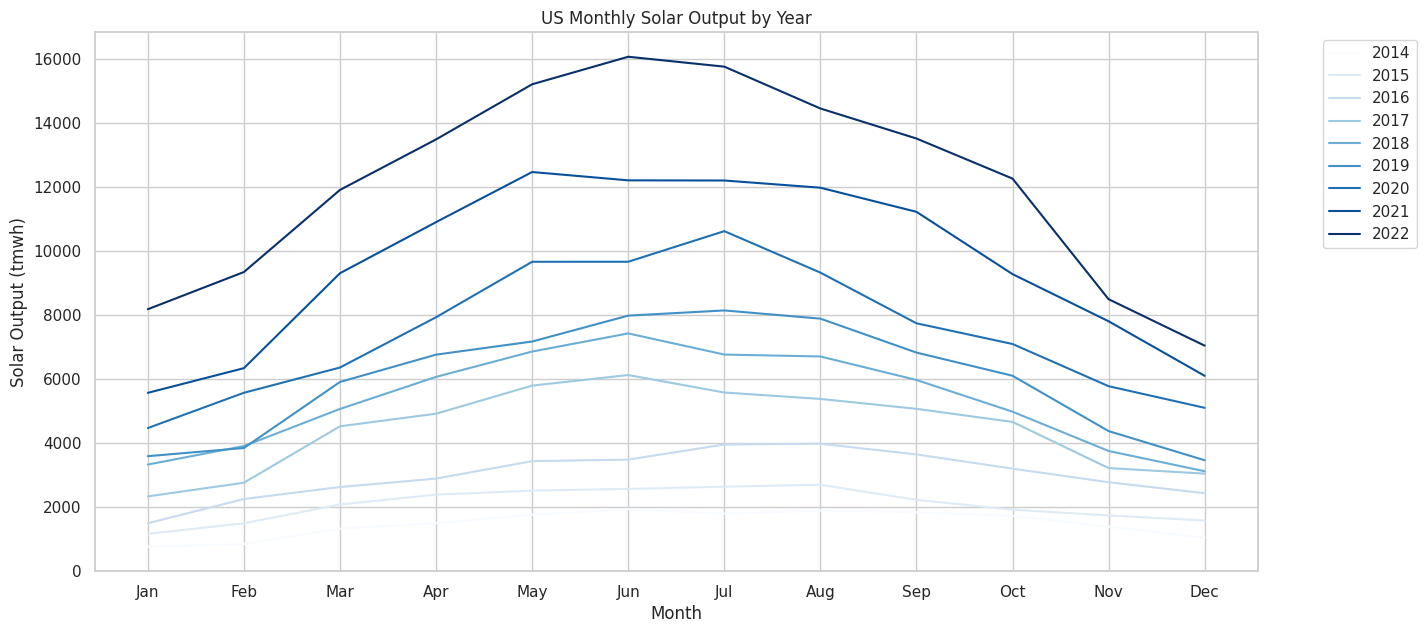

In [ ]:
#Plot Monthly Solar output by Year
fig, ax = plt.subplots(figsize= (15,7))

sns.lineplot(data=monthly_trends_df,
             x='Month',
             y='Solar Output (tmwh)',
             hue='Year',
             legend='full',
             palette='Blues')

# add title
plt.title('US Monthly Solar Output by Year')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

In [ ]:
#Group by month
us_month_groups = us_solar_df.groupby(pd.Grouper(freq ='M'))

# Create a new DataFrame and store monthly values in columns
us_solar_month = pd.DataFrame()

#Put month groups into new dataframe
for month, group in us_month_groups:
    us_solar_month[month.month] = group.values.ravel()

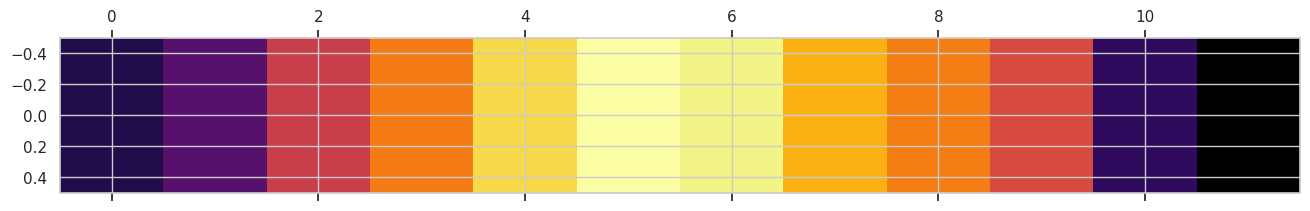

In [ ]:
# Draw a heatmap with matshow()
plt.matshow(us_solar_month, aspect='auto', cmap=plt.cm.inferno);

In [ ]:
#Calculate rolling statistics. Using a window of 12 for months in a year
us_roll_mean = us_solar_df.rolling(window=12, center=False).mean()
us_roll_std = us_solar_df.rolling(window=12, center=False).std()

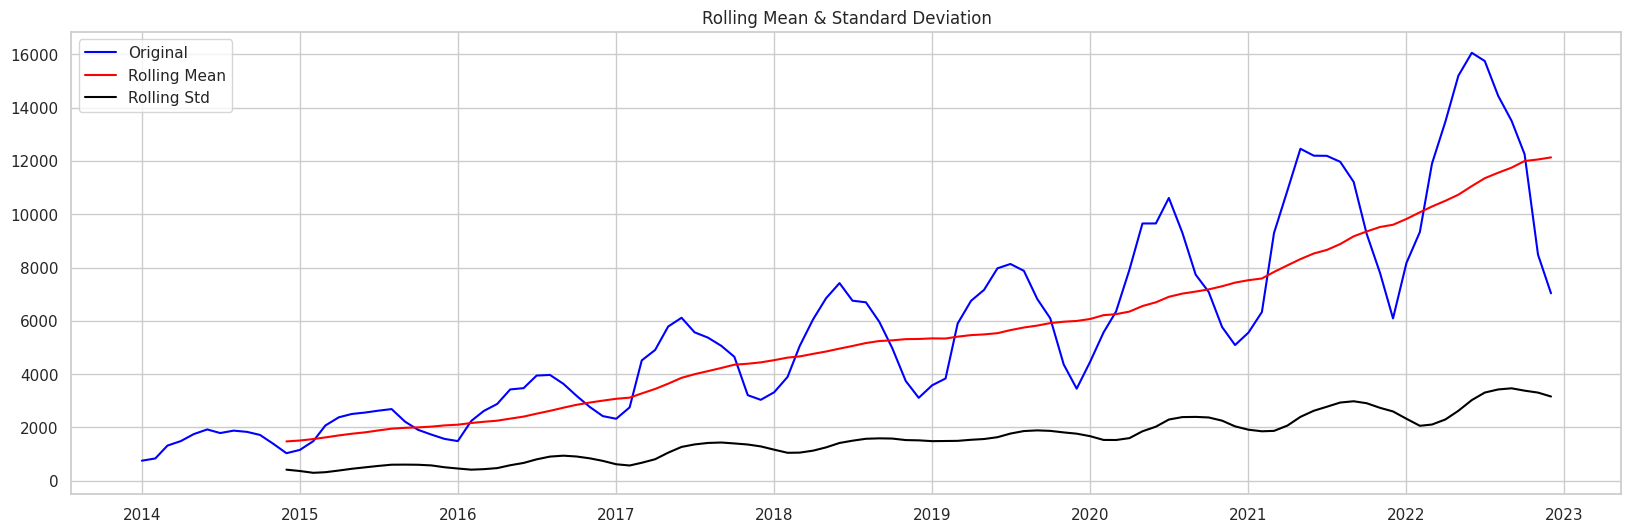

In [ ]:
#Plot our rolling statistics along with our original data
fig = plt.figure(figsize=(20,6))
plt.plot(us_solar_df, color='blue', label='Original')
plt.plot(us_roll_mean, color='red', label='Rolling Mean')
plt.plot(us_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Perform an Augmented Dickey-Fuller Test

# Extract and display test results in a user friendly manner
def df_printout(data):
    dftest= adfuller(data)
    dfoutput = pd.Series(dftest[0:4],
                         index=['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [ ]:
#View test results on original data
df_printout(us_solar_df)

ADF Test Statistic              1.891772
p-value                         0.998515
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [ ]:
# Subtract the moving average from the original data
us_solar_minus_roll_mean = us_solar_df - us_roll_mean
us_solar_minus_roll_mean.head(15)

,Solar Output (tmwh)
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,NaN
2014-07-01,NaN
2014-08-01,NaN
2014-09-01,NaN
2014-10-01,NaN


In [ ]:
# Drop the missing values from time series calculated above
us_solar_minus_roll_mean.dropna(inplace=True)

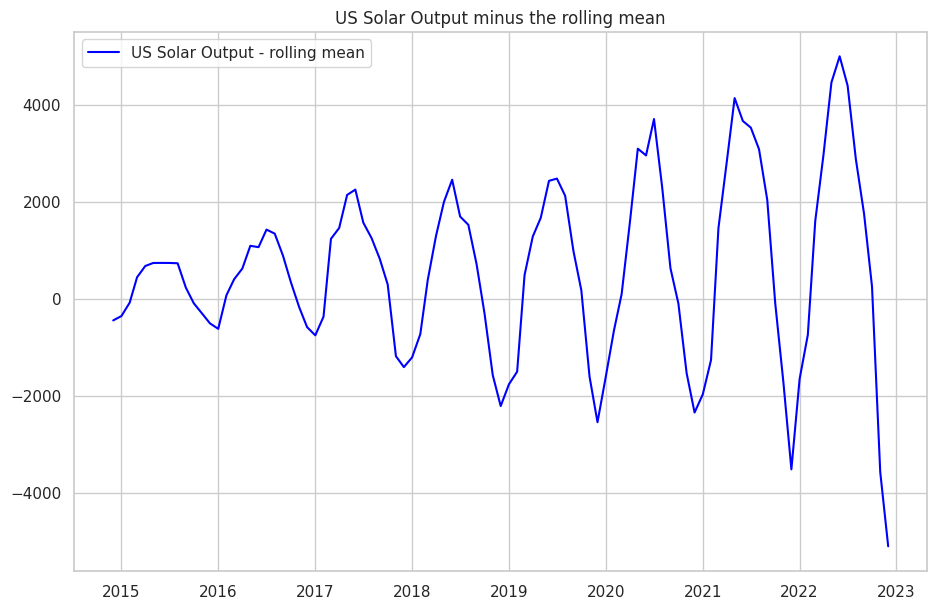

In [ ]:
#Plot our new data
fig = plt.figure(figsize=(11,7))
plt.plot(us_solar_minus_roll_mean, color='blue',label='US Solar Output - rolling mean')
plt.legend(loc='best')
plt.title('US Solar Output minus the rolling mean')
plt.show(block=False)

In [ ]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_minus_roll_mean)

ADF Test Statistic             -0.652434
p-value                         0.858689
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [ ]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
us_solar_ewm = us_solar_df.ewm(halflife=12).mean()

In [ ]:
#Subtract the EWMA from our original data
us_solar_minus_exp_roll_mean = us_solar_df - us_solar_ewm
us_solar_minus_exp_roll_mean.head()

,Solar Output (tmwh)
2014-01-01,0.000000
2014-02-01,40.787330
2014-03-01,338.367863
2014-04-01,370.061666
2014-05-01,491.417168


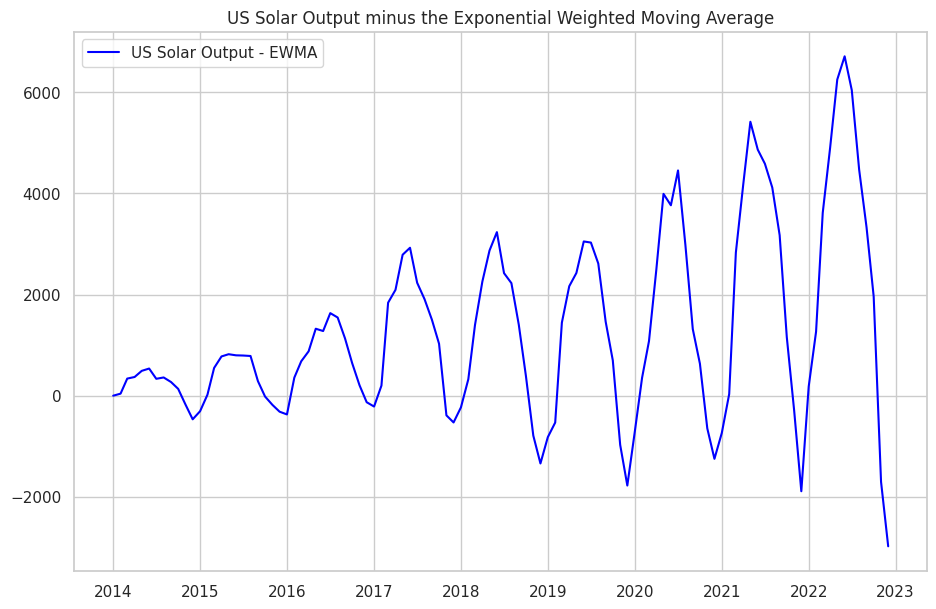

In [ ]:
#Plot our transformed ewm data
fig = plt.figure(figsize=(11,7))
plt.plot(us_solar_minus_exp_roll_mean, color='blue',label='US Solar Output - EWMA')
plt.legend(loc='best')
plt.title('US Solar Output minus the Exponential Weighted Moving Average')
plt.show(block=False)

In [ ]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_minus_exp_roll_mean)

ADF Test Statistic             -0.121499
p-value                         0.947255
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [ ]:
#Subtract previous observation (period = 1) from current observation
us_solar_diff = us_solar_df.diff(periods=1)
us_solar_diff.head(10)

,Solar Output (tmwh)
2014-01-01,NaN
2014-02-01,84.0
2014-03-01,482.0
2014-04-01,170.0
2014-05-01,263.0
2014-06-01,173.0
2014-07-01,-135.0
2014-08-01,91.0
2014-09-01,-47.0
2014-10-01,-115.0


In [ ]:
#Drop the null value
us_solar_diff.dropna(inplace=True)

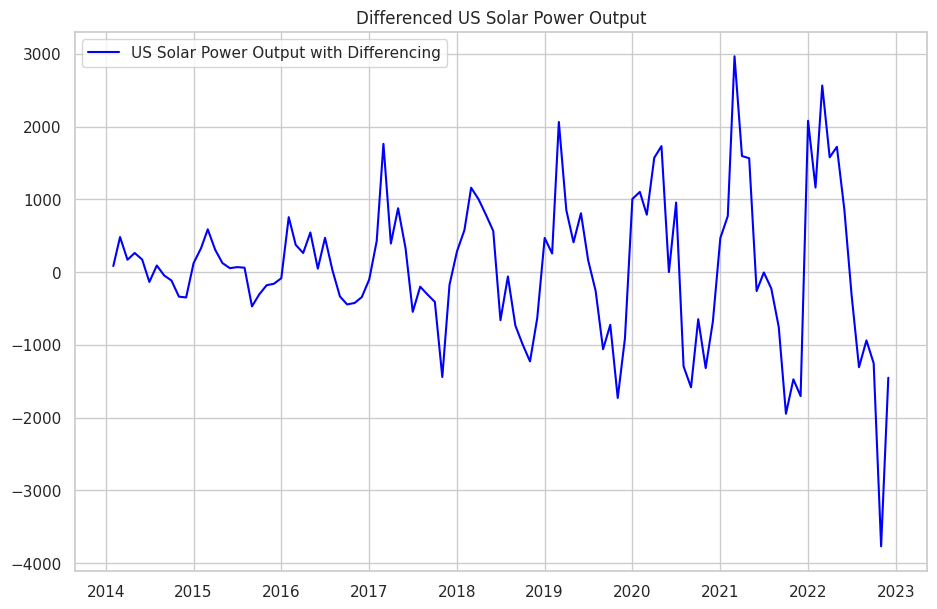

In [ ]:
#Plot our differenced data
fig = plt.figure(figsize=(11,7))
plt.plot(us_solar_diff, color='blue',label='US Solar Power Output with Differencing')
plt.legend(loc='best')
plt.title('Differenced US Solar Power Output')
plt.show(block=False)

In [ ]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_diff)

ADF Test Statistic             -1.524980
p-value                         0.521120
#Lags Used                     13.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


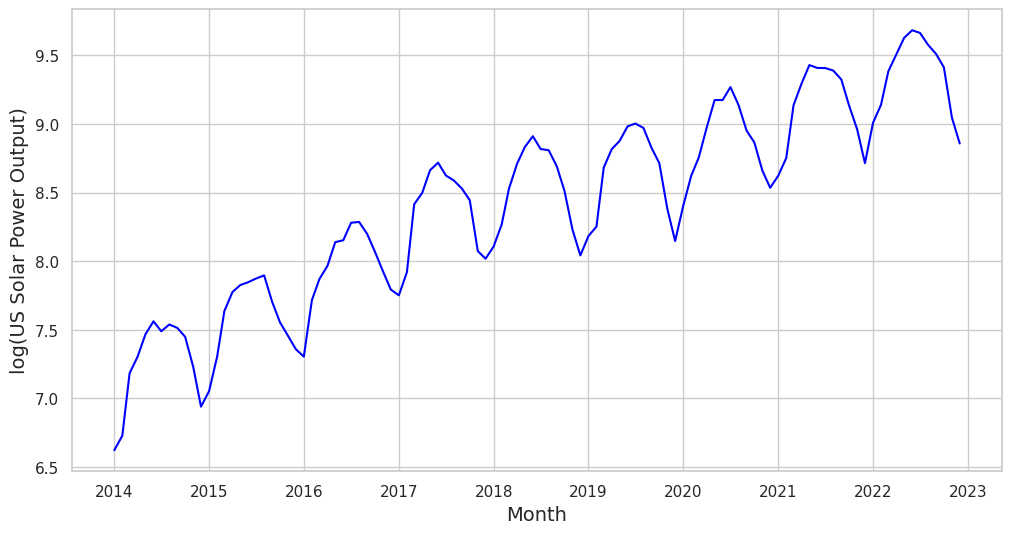

In [ ]:
#Log Transform the data
us_solar_log = np.log(us_solar_df)

#Plot the data
fig = plt.figure(figsize=(12,6))
plt.plot(us_solar_log, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(US Solar Power Output)', fontsize=14)
plt.show()

In [ ]:
df_printout(us_solar_log)

ADF Test Statistic             -1.543596
p-value                         0.511845
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


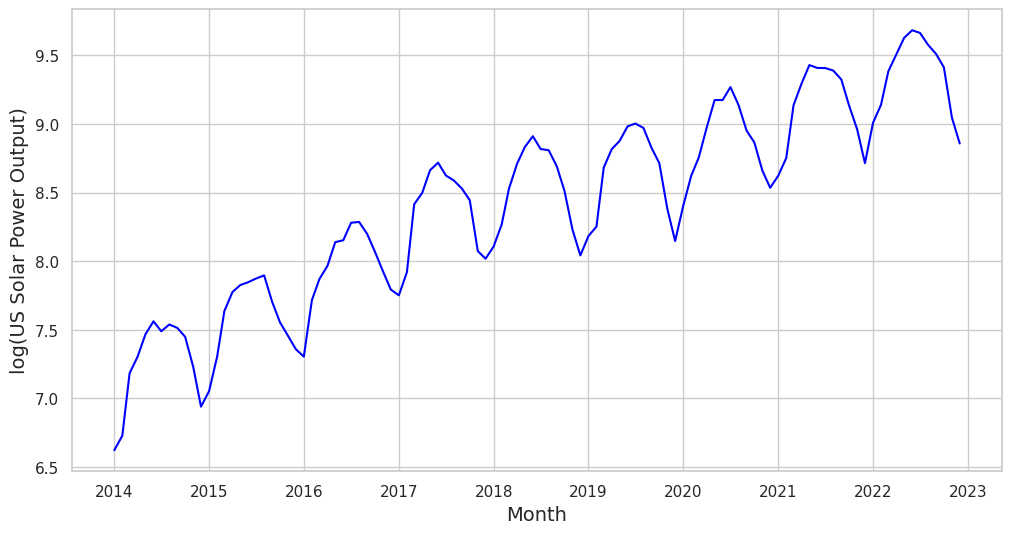

In [ ]:
#Square Root Transform the data
us_solar_sqrt = np.sqrt(us_solar_df)

#Plot the data
fig = plt.figure(figsize=(12,6))
plt.plot(us_solar_log, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(US Solar Power Output)', fontsize=14)
plt.show()

In [ ]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_sqrt)

ADF Test Statistic              0.473214
p-value                         0.984036
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [ ]:
#Decompose our original data
decomposition = seasonal_decompose(us_solar_df, model='multiplicative')
decomposition

In [ ]:
# Save the trend, seasonality and noise of decomposed object as variables
trend = decomposition.trend
seasonality = decomposition.seasonal
noise = decomposition.resid

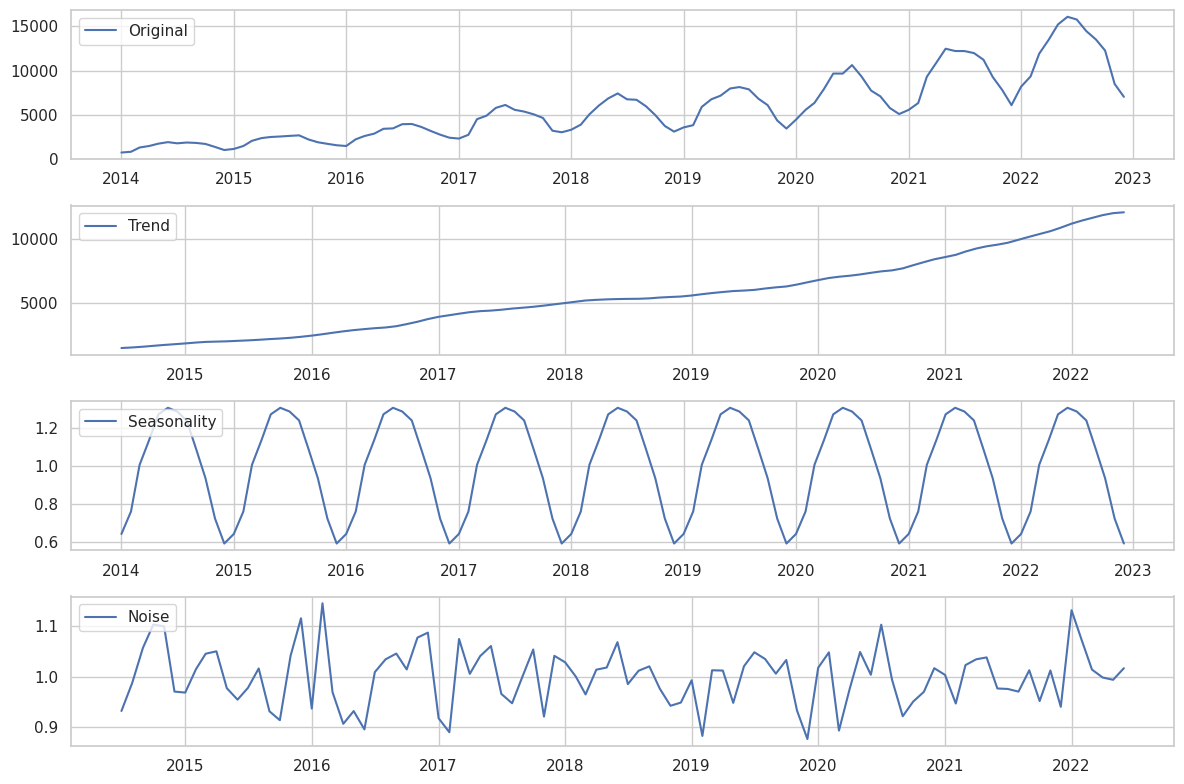

In [ ]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(us_solar_df, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
# Drop NaN values from residuals.
us_solar_decompose = noise
us_solar_decompose.dropna(inplace=True)

In [ ]:
#Che# Drop NaN values from residuals.
us_solar_decompose = noise
us_solar_decompose.dropna(inplace=True)ck for stationarity with the Dickey-Fuller Test
df_printout(us_solar_decompose)

ADF Test Statistic             -5.197997
p-value                         0.000009
#Lags Used                      7.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [ ]:
#Decompose our log transformed data
decomposition = seasonal_decompose(us_solar_log, model='additive')
decomposition

In [ ]:
# Save the trend, seasonality and noise of decomposed object as  variables
trend = decomposition.trend
seasonality = decomposition.seasonal
noise = decomposition.resid

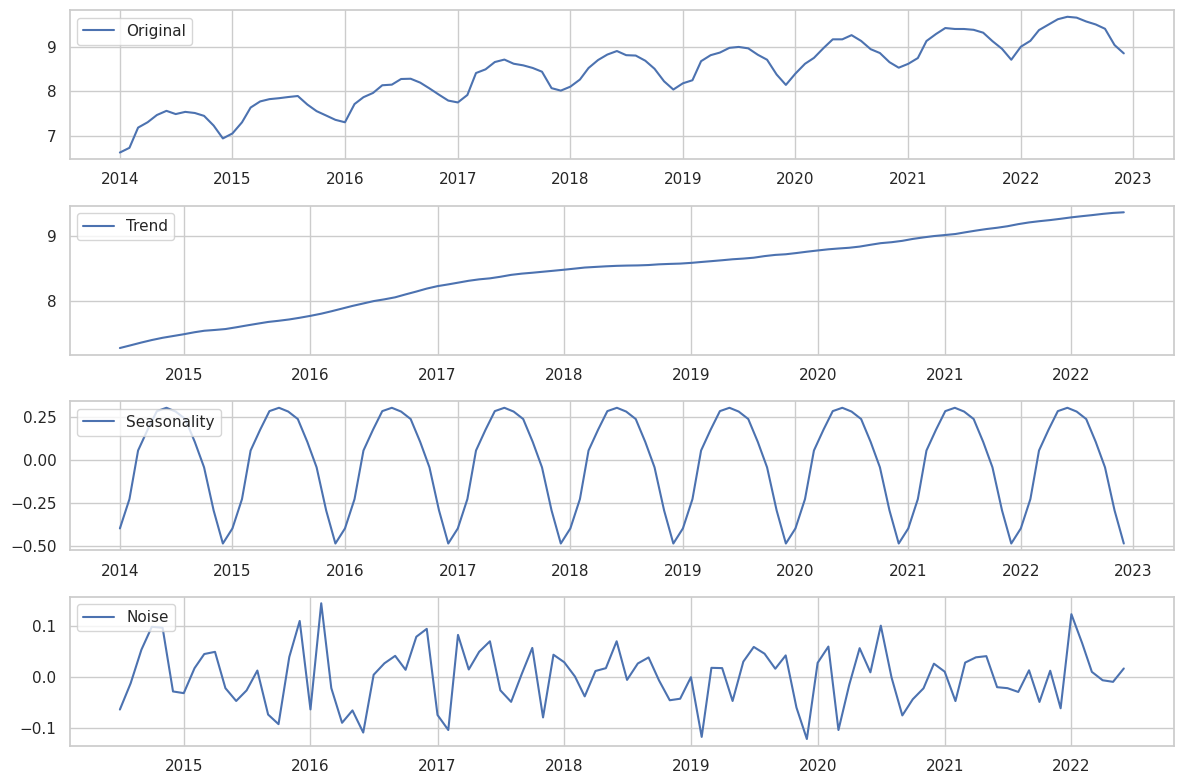

In [ ]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(us_solar_log, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
# Drop NaN values from residuals.
us_solar_log_decompose = noise
us_solar_log_decompose.dropna(inplace=True)

In [ ]:
#Check for stationarity with the Dickey-Fuller Test
df_printout(us_solar_log_decompose)

ADF Test Statistic             -5.604405
p-value                         0.000001
#Lags Used                      7.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [ ]:
# find the index which allows us to split off 20% of the data
cutoff = round(us_solar_decompose.shape[0]*0.8)
cutoff

77

In [ ]:
# Define train and test sets according to the index found above
train = us_solar_decompose[:cutoff]

test = us_solar_decompose[cutoff:]

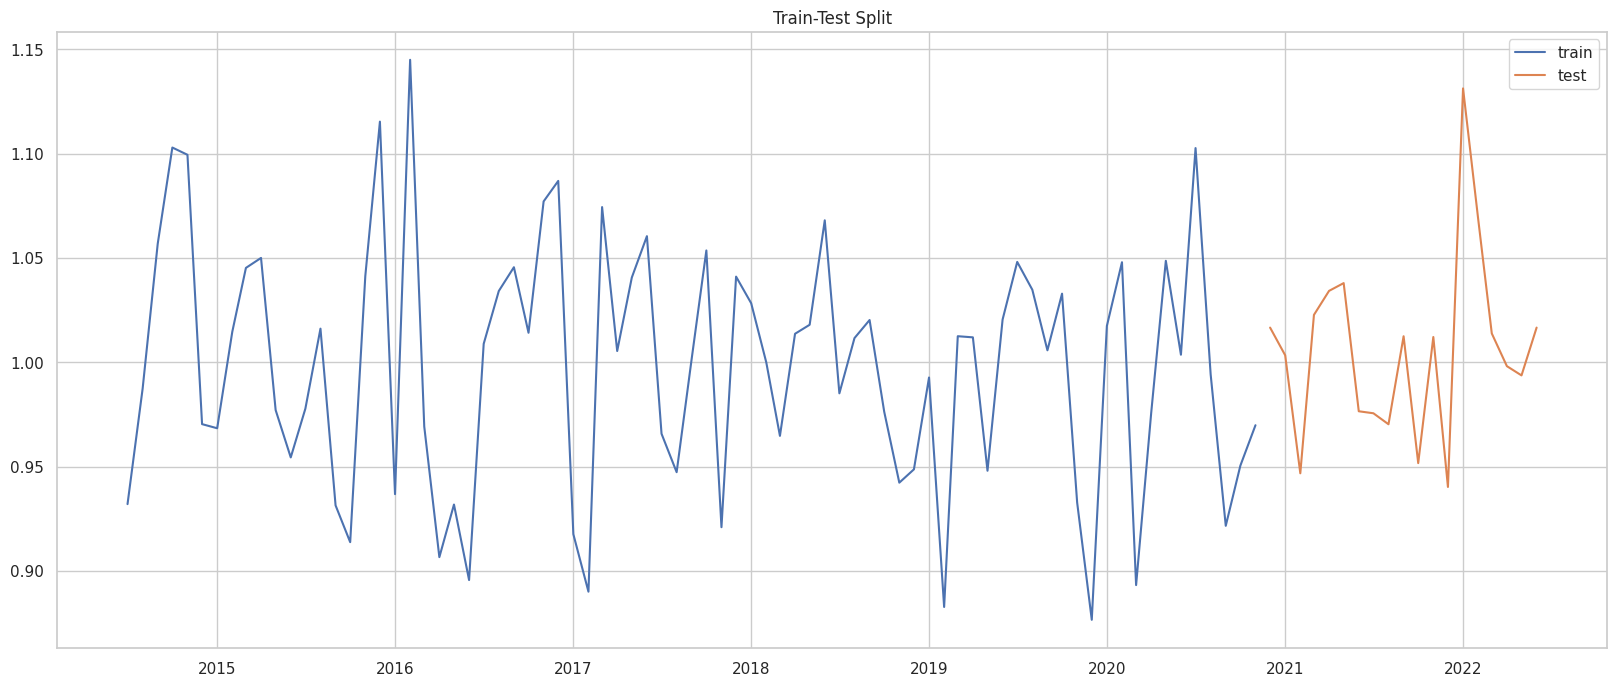

In [ ]:
# Plot of our train test split
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [ ]:
# Naive Forecasting: basing our prediction for a month on the previous month's output
naive = train.shift(1)
naive

,resid
2014-07-01,NaN
2014-08-01,0.932029
2014-09-01,0.987344
2014-10-01,1.056825
2014-11-01,1.102906
...,...
2020-07-01,1.003625
2020-08-01,1.102645
2020-09-01,0.994212
2020-10-01,0.921641


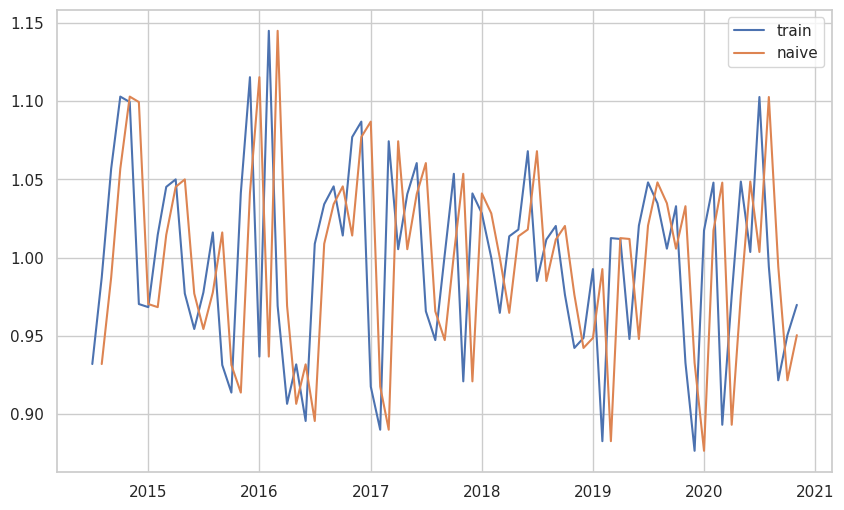

In [ ]:
#Plot our Naive model next to our tran data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train, label= "train")
ax.plot(naive, label= "naive")
ax.legend();

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

Naive_rmse = np.sqrt(mean_squared_error(train[1:], naive.dropna()))
print(Naive_rmse)

0.07904068292514177


In [ ]:
# Fit an ARIMA(0,1,0) model
RandWalk = ARIMA(train, order=(0,1,0)).fit()

# Print out summary information on the fit
print(RandWalk.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  85.033
Date:                Wed, 18 Jun 2025   AIC                           -168.066
Time:                        08:15:26   BIC                           -165.735
Sample:                    07-01-2014   HQIC                          -167.134
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0062      0.001      6.380      0.000       0.004       0.008
Ljung-Box (L1) (Q):                   8.51   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.00   Pr

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

RandWalk_rmse = np.sqrt(mean_squared_error(train, y_hat_rw))
print(RandWalk_rmse)

0.13209022785364416


In [ ]:
# Fit an ARIMA(1,0,0) model
AR1 = ARIMA(train, order=(1,0,0)).fit()

# Print out summary information on the fit
print(AR1.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 108.866
Date:                Wed, 18 Jun 2025   AIC                           -211.733
Time:                        08:16:14   BIC                           -204.701
Sample:                    07-01-2014   HQIC                          -208.920
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9976      0.008    132.330      0.000       0.983       1.012
ar.L1          0.1121      0.111      1.010      0.312      -0.105       0.330
sigma2         0.0035      0.001      5.355      0.0

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

AR1_rmse = np.sqrt(mean_squared_error(train, y_hat_ar1))
print(AR1_rmse)

0.058849724604183355


In [ ]:
# Fit an ARMA(0,0,10) model
MA1 = ARIMA(train, order=(0,0,1)).fit()

# Print out summary information on the fit
print(MA1.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 109.193
Date:                Wed, 18 Jun 2025   AIC                           -212.385
Time:                        08:16:58   BIC                           -205.354
Sample:                    07-01-2014   HQIC                          -209.573
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9975      0.008    125.395      0.000       0.982       1.013
ma.L1          0.1881      0.104      1.816      0.069      -0.015       0.391
sigma2         0.0034      0.001      5.410      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_hat_ma1 = MA1.predict(typ='levels')

# Compute RMSE manually
MA1_rmse = np.sqrt(mean_squared_error(train, y_hat_ma1))

print(MA1_rmse)

0.05860231185005376


In [ ]:
# Fit an ARMA(1,0,1) model
ARMA101 = ARIMA(train, order=(1,0,1)).fit()

# Print out summary information on the fit
print(ARMA101.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 110.712
Date:                Wed, 18 Jun 2025   AIC                           -213.425
Time:                        08:17:43   BIC                           -204.050
Sample:                    07-01-2014   HQIC                          -209.675
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9977      0.007    135.313      0.000       0.983       1.012
ar.L1         -0.6629      0.213     -3.105      0.002      -1.081      -0.244
ma.L1          0.8505      0.156      5.448      0.0

In [ ]:
import numpy as np

ARMA101_rmse = np.sqrt(mean_squared_error(train, y_hat_arma101))

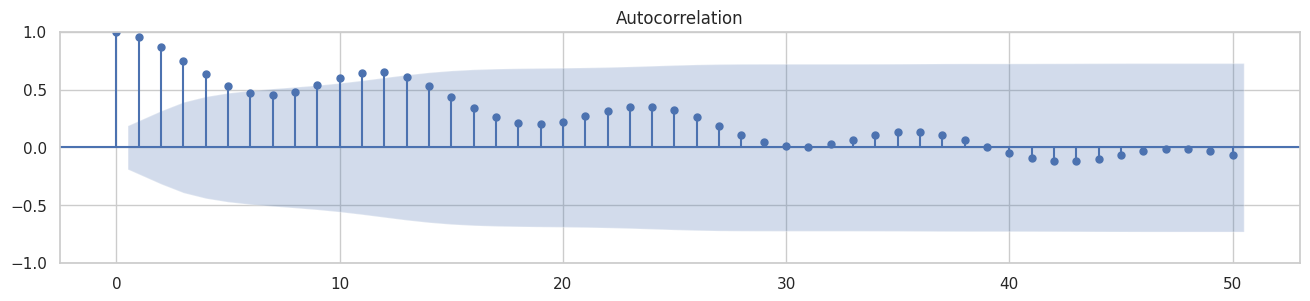

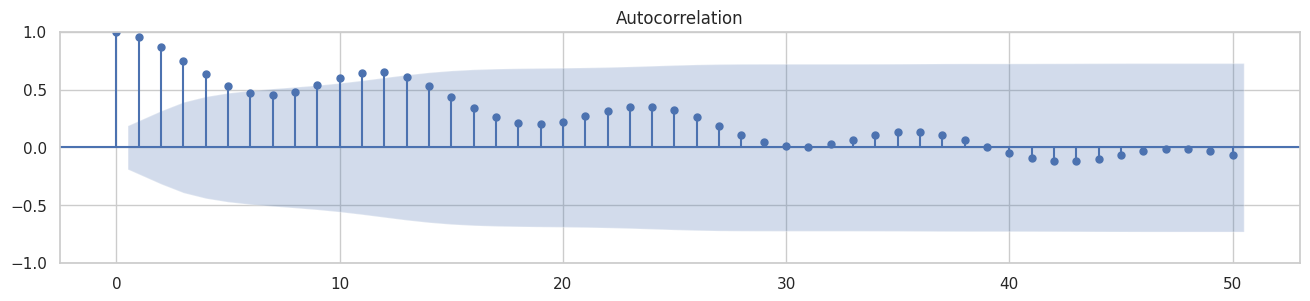

In [ ]:
# Plot the ACF for original data
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(us_solar_df, ax=ax, lags=50)

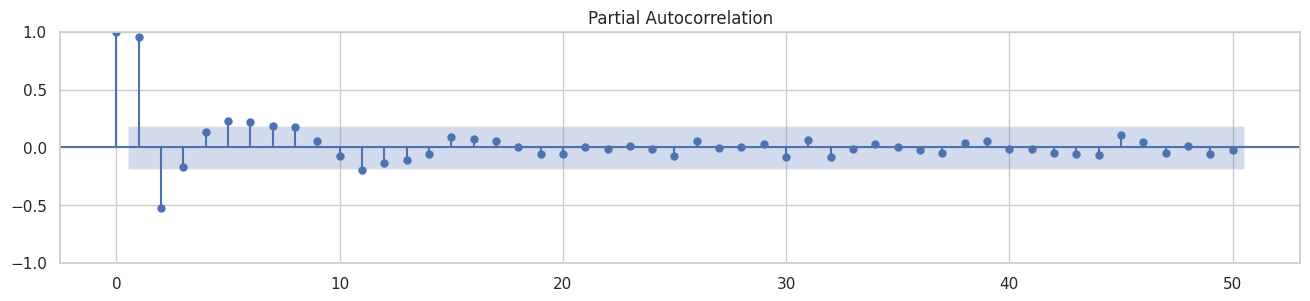

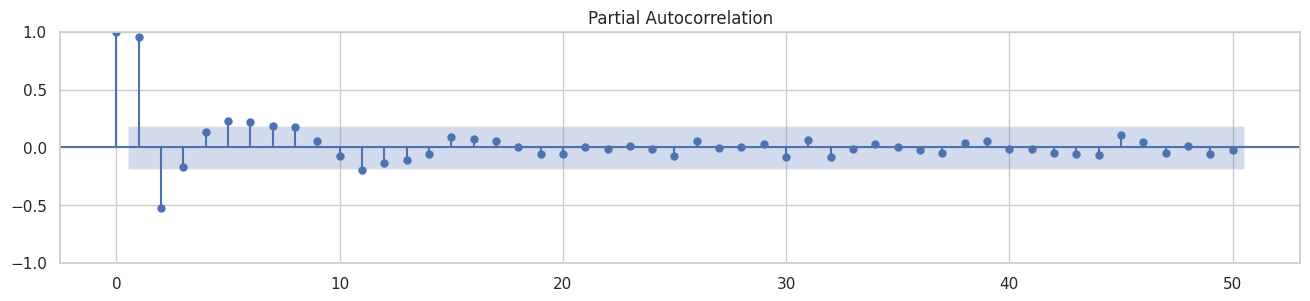

In [ ]:
# Plot the PACF for original data
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(us_solar_df, ax=ax, lags=50, method='ywm')

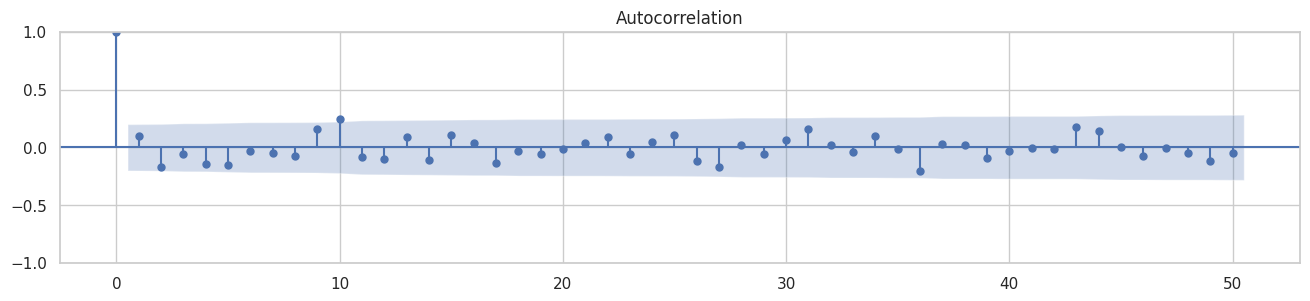

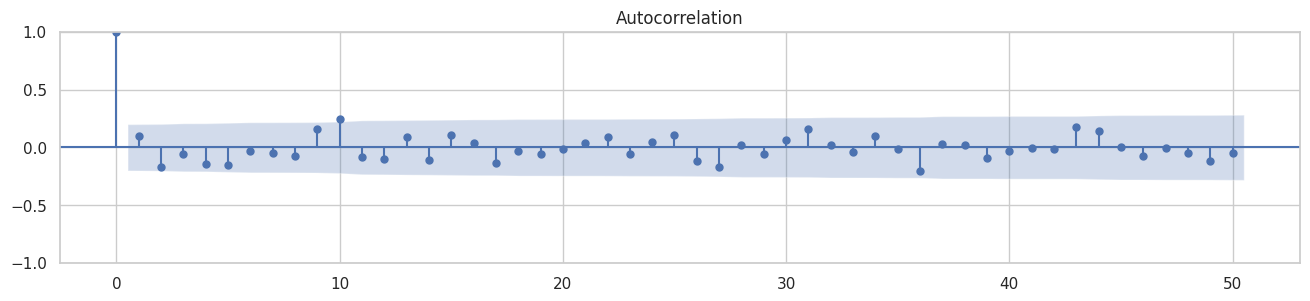

In [ ]:
# Plot the ACF for decomposed data
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(us_solar_decompose, ax=ax, lags=50)

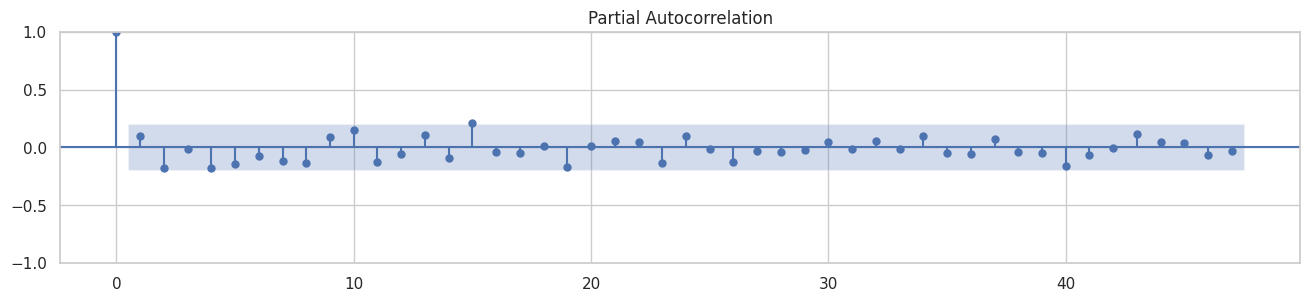

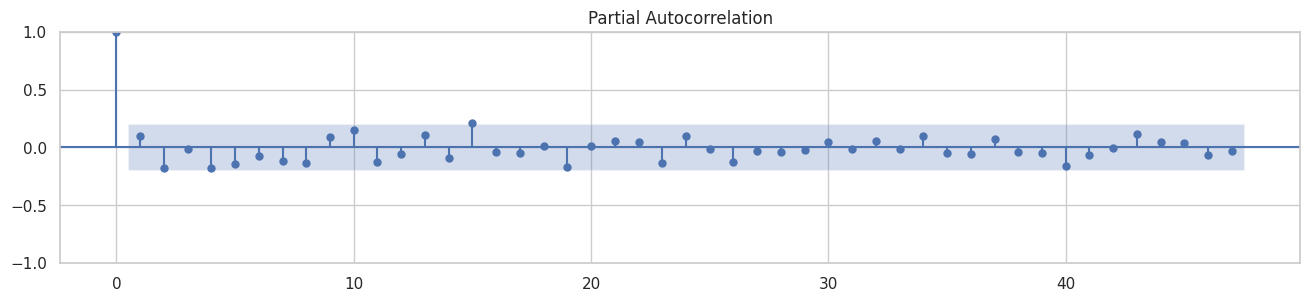

In [ ]:
# Plot the PACF for decomposed data
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(us_solar_decompose, ax=ax, lags=47, method='ywm')

In [ ]:
# Fit an ARMA(2,0,0) model
AR2 = ARIMA(train, order=(2,0,0)).fit()

# Print out summary information on the fit
print(AR2.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 110.489
Date:                Wed, 18 Jun 2025   AIC                           -212.979
Time:                        08:19:04   BIC                           -203.604
Sample:                    07-01-2014   HQIC                          -209.229
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9980      0.006    155.762      0.000       0.985       1.011
ar.L1          0.1341      0.108      1.244      0.213      -0.077       0.345
ar.L2         -0.2033      0.121     -1.675      0.0

In [ ]:
import numpy as np

AR2_rmse = np.sqrt(mean_squared_error(train, y_hat_ar2))
print(AR2_rmse)

0.05761095952765403


In [ ]:
# Fit an ARMA(3,0,0) model
AR3 = ARIMA(train, order=(3,0,0)).fit()

# Print out summary information on the fit
print(AR3.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 110.510
Date:                Wed, 18 Jun 2025   AIC                           -211.020
Time:                        08:19:57   BIC                           -199.301
Sample:                    07-01-2014   HQIC                          -206.333
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9979      0.007    150.024      0.000       0.985       1.011
ar.L1          0.1386      0.114      1.211      0.226      -0.086       0.363
ar.L2         -0.2060      0.122     -1.691      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict
y_hat_ar3 = AR3.predict(typ='levels')

# Compute RMSE manually
AR3_rmse = np.sqrt(mean_squared_error(train, y_hat_ar3))

print(AR3_rmse)

0.05759533013810275


In [ ]:
# Fit an ARMA(0,0,2) model
MA2 = ARIMA(train, order=(0,0,2)).fit()

# Print out summary information on the fit
print(MA2.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 111.338
Date:                Wed, 18 Jun 2025   AIC                           -214.675
Time:                        08:20:34   BIC                           -205.300
Sample:                    07-01-2014   HQIC                          -210.925
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9981      0.006    180.489      0.000       0.987       1.009
ma.L1          0.1116      0.115      0.970      0.332      -0.114       0.337
ma.L2         -0.2965      0.156     -1.897      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict
y_hat_ma2 = MA2.predict(typ='levels')

# Compute RMSE manually
MA2_rmse = np.sqrt(mean_squared_error(train, y_hat_ma2))

print(MA2_rmse)

0.056972317043306686


In [ ]:
# Fit an ARMA(0,0,5) model
MA5 = ARIMA(train, order=(0,0,5)).fit()

# Print out summary information on the fit
print(MA5.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(0, 0, 5)   Log Likelihood                 113.962
Date:                Wed, 18 Jun 2025   AIC                           -213.924
Time:                        08:52:23   BIC                           -197.518
Sample:                    07-01-2014   HQIC                          -207.362
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9977      0.003    342.225      0.000       0.992       1.003
ma.L1          0.0897      0.124      0.722      0.470      -0.154       0.333
ma.L2         -0.2608      0.138     -1.894      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict
y_hat_ma5 = MA5.predict(typ='levels')

# Compute RMSE manually
MA5_rmse = np.sqrt(mean_squared_error(train, y_hat_ma5))

print(MA5_rmse)

0.055102636925194334


In [ ]:
# Fit an ARMA(0,0,12) model
MA12 = ARIMA(train, order=(0,0,12)).fit()

# Print out summary information on the fit
print(MA12.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                ARIMA(0, 0, 12)   Log Likelihood                 121.012
Date:                Wed, 18 Jun 2025   AIC                           -214.024
Time:                        08:53:04   BIC                           -181.211
Sample:                    07-01-2014   HQIC                          -200.899
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9976      0.003    311.116      0.000       0.991       1.004
ma.L1          0.1731      0.133      1.302      0.193      -0.087       0.434
ma.L2         -0.2507      0.173     -1.447      0.1

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prediction
y_hat_ma12 = MA12.predict(typ='levels')

# Manually compute RMSE
MA12_rmse = np.sqrt(mean_squared_error(train, y_hat_ma12))

print(MA12_rmse)

0.050694984019170775


In [ ]:
#Create list of SARIMAX parameters to test for pdq and PDQ (seasonal pdq)
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(pdq)]

In [ ]:
# #Instantiate list to save model results to
sarimax_param_combinations = []

#Run through all iterations of parameters and return parameters with AIC Score
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=-1)
            sarimax_param_combinations.append([param, param_seasonal, results.aic])
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('Did not run model')
            break

SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:217.733673314469
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:129.6757580321979
SARIMAX(0, 0, 0)x(0, 0, 2, 12) - AIC:2273.665404425454
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:-128.78199160238742
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:-126.8718505536869
SARIMAX(0, 0, 0)x(0, 1, 2, 12) - AIC:-99.39266363906712
SARIMAX(0, 0, 0)x(0, 2, 0, 12) - AIC:-46.4120659736569
SARIMAX(0, 0, 0)x(0, 2, 1, 12) - AIC:-80.60323783462266
SARIMAX(0, 0, 0)x(0, 2, 2, 12) - AIC:-60.366444452372605
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:-130.27626305261467
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:-145.3222104337561
SARIMAX(0, 0, 0)x(1, 0, 2, 12) - AIC:-111.20454581259355
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:-130.64580660533585
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:-127.04228719436415
SARIMAX(0, 0, 0)x(1, 1, 2, 12) - AIC:-98.61559321955764
SARIMAX(0, 0, 0)x(1, 2, 0, 12) - AIC:-82.1952977086744
SARIMAX(0, 0, 0)x(1, 2, 1, 12) - AIC:-80.39338072806203
SARIMAX(0, 0, 0)x(1, 2, 2, 12) - AIC:-58.4332625

In [ ]:
# # Find the parameters with minimal AIC value
sarimax_param_combinations_df = pd.DataFrame(sarimax_param_combinations, columns=['pdq', 'pdqs', 'aic'])
sarimax_param_combinations_df.loc[sarimax_param_combinations_df['aic'].idxmin()]

,270
pdq,"(1, 0, 1)"
pdqs,"(0, 0, 0, 12)"
aic,-201.738957


In [ ]:
# Fit an SARIMAX(1,0,1)x(0,0,0,12) model (-250.411 AIC expected) w False Stationarity/Invertability
SARIMAX101 = SARIMAX(train,
                     order=(1,0,1),
                     seasonal_order = (0,0,0,12),
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit()

# Print out summary information on the fit
print(SARIMAX101.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 103.869
Date:                Wed, 18 Jun 2025   AIC                           -201.739
Time:                        09:04:47   BIC                           -194.786
Sample:                    07-01-2014   HQIC                          -198.963
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.000   2950.391      0.000       0.999       1.000
ma.L1         -1.0001     34.859     -0.029      0.977     -69.322      67.322
sigma2         0.0035      0.121      0.029      0.9

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict values using the SARIMAX model
y_hat_S101 = SARIMAX101.predict(typ='levels')

# Compute RMSE manually
SARIMAX101_rmse = np.sqrt(mean_squared_error(train, y_hat_S101))

print(SARIMAX101_rmse)

0.12212590820950474


In [ ]:
#Create list of ARIMA parameters to test for pdq and PDQ (seasonal pdq)
p = q = range(0, 11)

# Generate all different combinations of p, d, and q
pdq = list(itertools.product(p, [0], q))

In [ ]:
# #Instantiate list to save model results to
arima_param_combinations = []

#Run through all iterations of parameters and return parameters with AIC Score
for param in pdq:
    try:
        model = ARIMA(train,
                      order=param,
                      enforce_stationarity=True,#True because my data is already stationary
                      enforce_invertibility=True)
        results = model.fit()
        arima_param_combinations.append([param, results.aic])
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        print('Did not run model')
        break

ARIMA(0, 0, 0) - AIC:-212.7647441329701
ARIMA(0, 0, 1) - AIC:-212.38530283299337
ARIMA(0, 0, 2) - AIC:-214.67513594793314
ARIMA(0, 0, 3) - AIC:-213.59462805017364
ARIMA(0, 0, 4) - AIC:-214.4795587459352
ARIMA(0, 0, 5) - AIC:-213.9244162588116
ARIMA(0, 0, 6) - AIC:-211.92933729477275
ARIMA(0, 0, 7) - AIC:-210.6714445007642
ARIMA(0, 0, 8) - AIC:-208.8531902388854
ARIMA(0, 0, 9) - AIC:-205.06952395935204
ARIMA(0, 0, 10) - AIC:-206.1119488024691
ARIMA(1, 0, 0) - AIC:-211.73270831849814
ARIMA(1, 0, 1) - AIC:-213.42493649320886
ARIMA(1, 0, 2) - AIC:-215.67024754659622
ARIMA(1, 0, 3) - AIC:-213.85299673505293
ARIMA(1, 0, 4) - AIC:-213.4353695704699
ARIMA(1, 0, 5) - AIC:-211.78668671054783
ARIMA(1, 0, 6) - AIC:-209.95175593816757
ARIMA(1, 0, 7) - AIC:-208.92281975275944
ARIMA(1, 0, 8) - AIC:-206.90722994689918
ARIMA(1, 0, 9) - AIC:-203.10180725463275
ARIMA(1, 0, 10) - AIC:-208.2995370135048
ARIMA(2, 0, 0) - AIC:-212.97897613746315
ARIMA(2, 0, 1) - AIC:-211.73359891346647
ARIMA(2, 0, 2) - AIC:-

In [ ]:
# # Find the parameters with minimal AIC value
arima_param_combinations_df = pd.DataFrame(arima_param_combinations, columns=['pdq', 'aic'])
arima_param_combinations_df.loc[arima_param_combinations_df['aic'].idxmin()]

,13
pdq,"(1, 0, 2)"
aic,-215.670248


In [ ]:
# Fit an ARIMA(4,0,1) model (-266.143 AIC expected)
ARIMA401 = ARIMA(train, order=(4,0,1)).fit()

# Print out summary information on the fit
print(ARIMA401.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   77
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 114.553
Date:                Wed, 18 Jun 2025   AIC                           -215.107
Time:                        09:06:03   BIC                           -198.700
Sample:                    07-01-2014   HQIC                          -208.544
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9977      0.003    319.644      0.000       0.992       1.004
ar.L1          0.7464      0.224      3.330      0.001       0.307       1.186
ar.L2         -0.3436      0.146     -2.352      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict values using the ARIMA(4,0,1) model
y_hat_ARIMA401 = ARIMA401.predict(typ='levels')

# Compute RMSE manually
ARIMA401_rmse = np.sqrt(mean_squared_error(train, y_hat_ARIMA401))

print(ARIMA401_rmse)


0.05470680970125518


In [ ]:
# find the index which allows us to split off 20% of the data
cutoff = round(us_solar_df.shape[0]*0.8)

#Train Test split original non-stationary data and reeset the index as we need dates in a column
train_prophet_df = us_solar_df[:cutoff].reset_index()
test_prophet_df = us_solar_df[cutoff:].reset_index()

# Rename the columns [index, Solar Output (tmwh)] to [ds, y]
train_prophet_df = train_prophet_df.rename(columns={'index': 'ds',
                                              'Solar Output (tmwh)': 'y'})

test_prophet_df = test_prophet_df.rename(columns={'index': 'ds',
                                             'Solar Output (tmwh)': 'y'})

print("Train length:", len(train_prophet_df))
print("Test length:", len(test_prophet_df))

Train length: 86
Test length: 22


In [ ]:
# Instantiate prophet object. Use an uncertainty interval of 95% (default is 80%)
prophet_model = Prophet(interval_width=0.95)

#Fit our prophet-formatted original data
prophet_model.fit(train_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiobo6u5/_4l_b3yv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiobo6u5/5irc0dp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47119', 'data', 'file=/tmp/tmppiobo6u5/_4l_b3yv.json', 'init=/tmp/tmppiobo6u5/5irc0dp4.json', 'output', 'file=/tmp/tmppiobo6u5/prophet_modelkc_mcbha/prophet_model-20250618090608.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Use make_future_dataframe() with a monthly frequency and periods = 12 for 1 year forecast
future_dates = prophet_model.make_future_dataframe(periods=22, freq='MS')
future_dates.tail(22)

,ds
86,2021-03-01
87,2021-04-01
88,2021-05-01
89,2021-06-01
90,2021-07-01
91,2021-08-01
92,2021-09-01
93,2021-10-01
94,2021-11-01
95,2021-12-01


In [ ]:
# Predict the values for future dates and take the head of predicted values
prophet_predict = prophet_model.predict(future_dates)

# Subset above columns and view the tail
prophet_predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
103,2022-08-01,10360.780612,9141.344575,11615.331726
104,2022-09-01,9734.457210,8462.326096,10962.024006
105,2022-10-01,9196.470465,7918.174045,10359.241009
106,2022-11-01,8226.829945,6984.040267,9574.968938
107,2022-12-01,7728.658004,6421.796805,8955.294784


In [ ]:
# Turn Test data back into a datetime dataframe so we can plot it easily
test_prophet_df.set_index('ds', inplace=True)
test_prophet_df.head()

,y
ds,
2021-03-01,9296
2021-04-01,10892
2021-05-01,12457
2021-06-01,12197
2021-07-01,12192


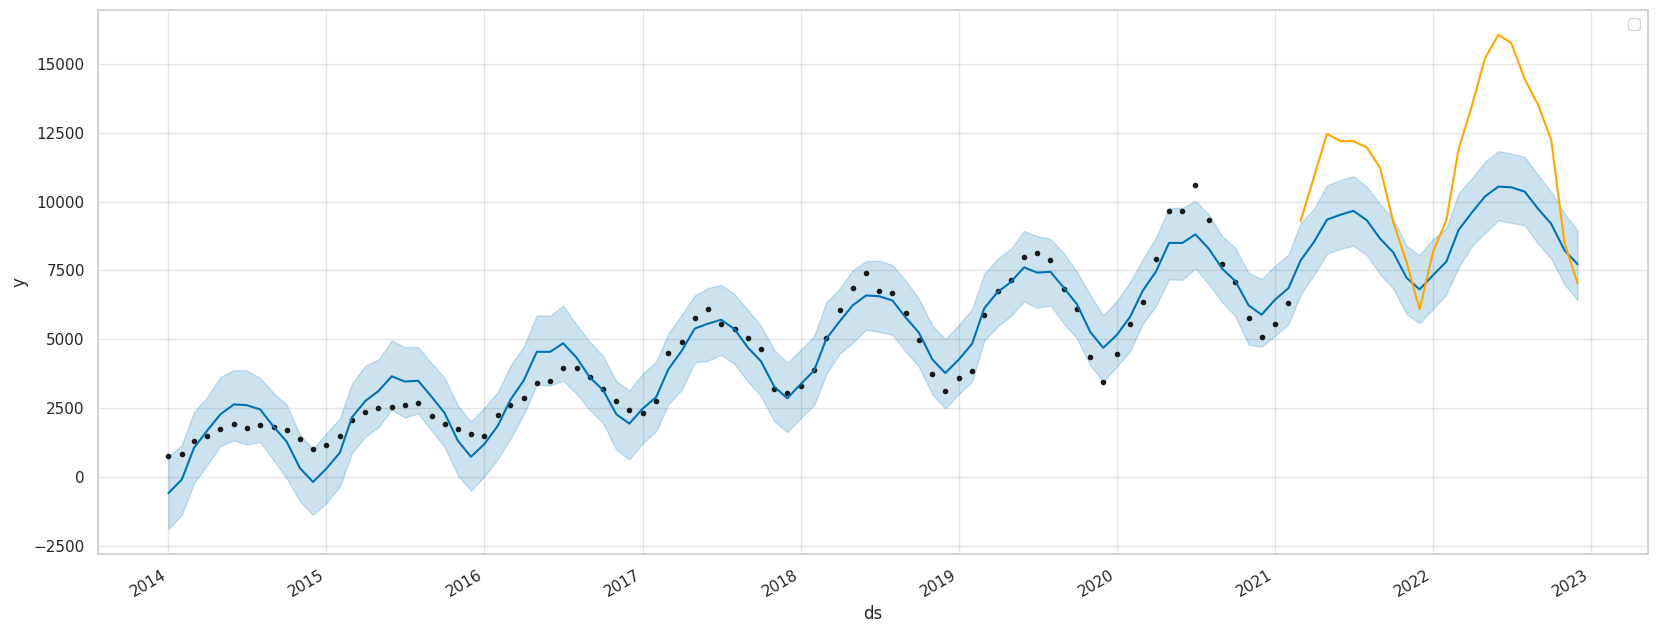

In [ ]:
# Plot our prophet_forecast predictions
fig, ax =plt.subplots(figsize=(20,8))

#Plot Prophet predictions on train and test values in BLUE
p_graph = prophet_model.plot(prophet_predict, ax=ax, uncertainty=True)
p_graph.set_label('Prophet Predictions')

# Plot Test data in ORANGE
tp_graph = test_prophet_df.plot(ax=ax, color= 'orange')
tp_graph.set_label('True Values')

ax.legend((p_graph, tp_graph), ('Prophet Predictions', 'True Values'))
plt.show()

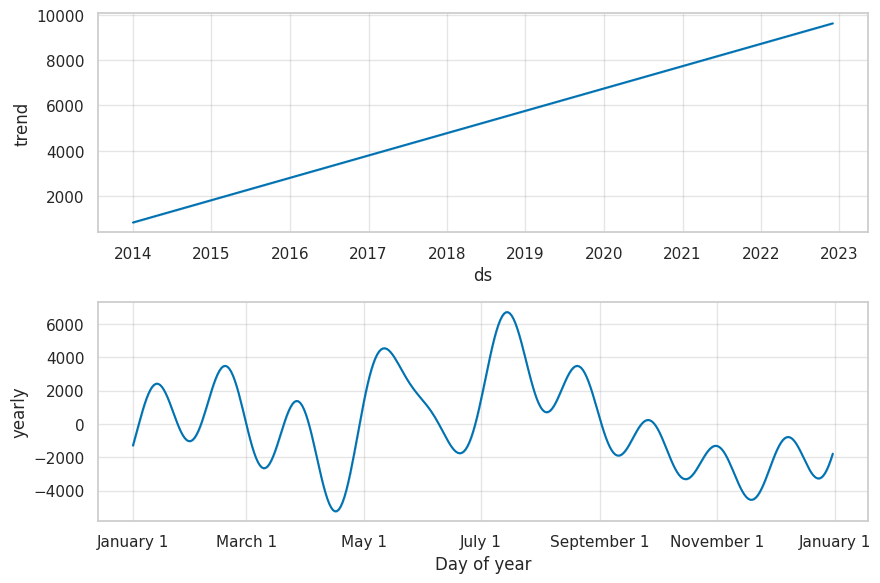

In [ ]:
# Plot model components
prophet_model.plot_components(prophet_predict)
plt.show()

In [ ]:
#Turn Prophets yhat predictions into datetime dataframe
prophet_predict.set_index('ds', inplace=True)
yhat_prophet = prophet_predict['2021-03-01':]['yhat']
yhat_prophet

,yhat
ds,
2021-03-01,7860.540625
2021-04-01,8535.453210
2021-05-01,9342.617303
2021-06-01,9521.691868
2021-07-01,9662.205041
2021-08-01,9322.489035
2021-09-01,8648.406410
2021-10-01,8157.799668
2021-11-01,7231.544757


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE manually
Prophet_rmse = np.sqrt(mean_squared_error(test_prophet_df, yhat_prophet))

print(Prophet_rmse)

2990.5995578905645


In [ ]:
#Comparison of Models RMSE and AIC
print("MODEL | RMSE| AIC")
print(('Naive', Naive_rmse))
print(('RandWalk', RandWalk_rmse, RandWalk.aic))
print(('AR1', AR1_rmse, AR1.aic))
print(('MA1', MA1_rmse, MA1.aic))
print(('ARMA101', ARMA101_rmse, ARMA101.aic))
print(('AR2', AR2_rmse, AR2.aic))
print(('AR3', AR3_rmse, AR3.aic))
print(('MA2', MA2_rmse, MA2.aic))
print(('MA5', MA5_rmse, MA5.aic))
print(('MA12', MA12_rmse, MA12.aic))
print(('SARIMAX101', SARIMAX101_rmse, SARIMAX101.aic))
print(('ARIMA401', ARIMA401_rmse, ARIMA401.aic))
print(('Prophet', Prophet_rmse))

MODEL | RMSE| AIC
('Naive', np.float64(0.07904068292514177))
('RandWalk', np.float64(0.13209022785364416), np.float64(-168.06581542809036))
('AR1', np.float64(0.058849724604183355), np.float64(-211.73270831849814))
('MA1', np.float64(0.05860231185005376), np.float64(-212.38530283299337))
('ARMA101', np.float64(0.05745740636349932), np.float64(-213.42493649320886))
('AR2', np.float64(0.05761095952765403), np.float64(-212.97897613746315))
('AR3', np.float64(0.05759533013810275), np.float64(-211.02022935706995))
('MA2', np.float64(0.056972317043306686), np.float64(-214.67513594793314))
('MA5', np.float64(0.055102636925194334), np.float64(-213.9244162588116))
('MA12', np.float64(0.050694984019170775), np.float64(-214.02445963583588))
('SARIMAX101', np.float64(0.12212590820950474), np.float64(-201.73895728857488))
('ARIMA401', np.float64(0.05470680970125518), np.float64(-215.10672901196904))
('Prophet', np.float64(2990.5995578905645))


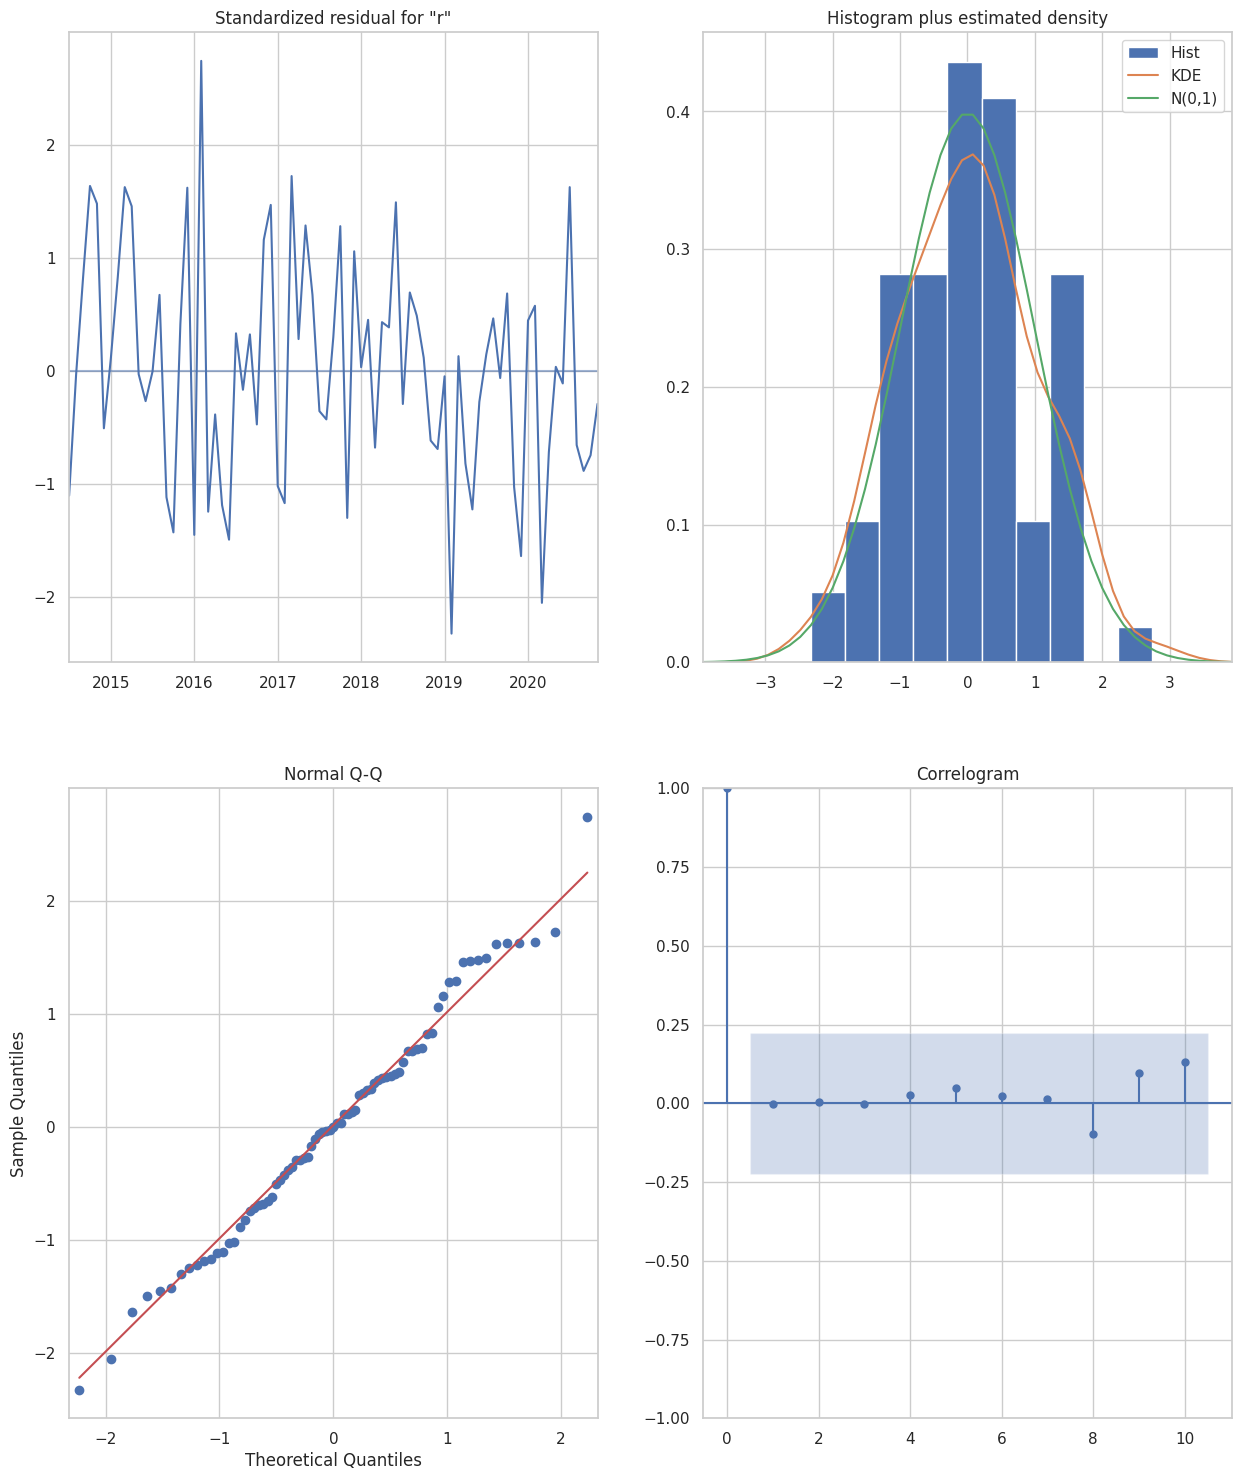

In [ ]:
# Call plot_diagnostics() on the final model
ARIMA401.plot_diagnostics(figsize=(15, 18))
plt.show()

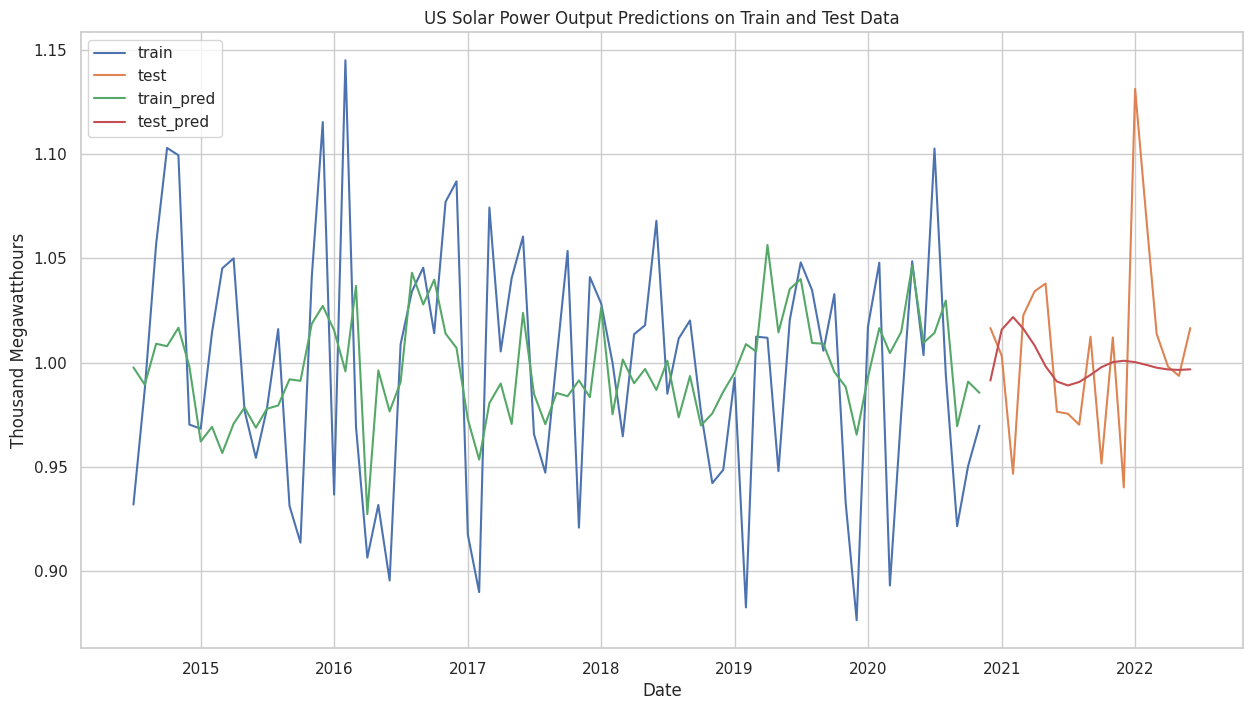

In [ ]:
y_hat_train = ARIMA401.predict(typ='levels')
y_hat_test = ARIMA401.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

# Set axes labels
ax.set_title('US Solar Power Output Predictions on Train and Test Data')
ax.set_xlabel('Date')
ax.set_ylabel('Thousand Megawatthours')

plt.legend();

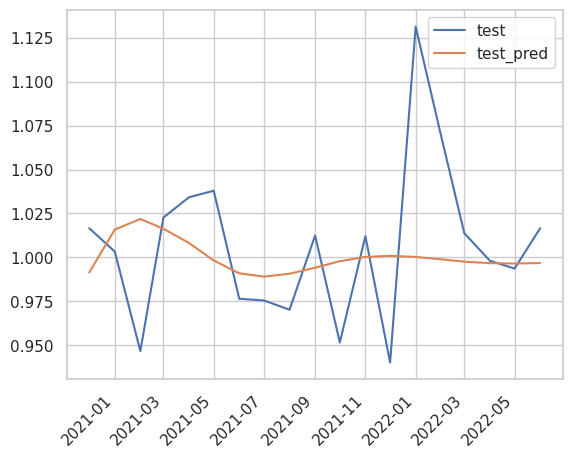

In [ ]:
# Let's zoom in on test
fig, ax = plt.subplots()

ax.plot(test, label='test')
ax.plot(y_hat_test, label='test_pred')
plt.xticks(rotation = 45, ha='right');

plt.legend();

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE manually
rmse_test = np.sqrt(mean_squared_error(test, y_hat_test))

print(rmse_test)

0.04501887534104186


In [ ]:
#Define a function for calculating MAPE
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [ ]:
#MAPE for our ARIMA401 Test
mape(test, y_hat_test)

np.float64(3.16)

In [ ]:
#Train final forecasting model on all data
forecast_model = ARIMA(us_solar_df,
                       order=(4, 0, 1)).fit()

In [ ]:
#Forecast 1 year (12 months) forward
forecast = forecast_model.forecast(steps=12)

In [ ]:
#Let's look at our forecasted values
forecast

,predicted_mean
2023-01-01,5860.415038
2023-02-01,6408.924894
2023-03-01,7703.508740
2023-04-01,9715.959320
2023-05-01,11676.638653
2023-06-01,13223.477450
2023-07-01,13956.207114
2023-08-01,13810.175265
2023-09-01,12886.352027
2023-10-01,11493.919993


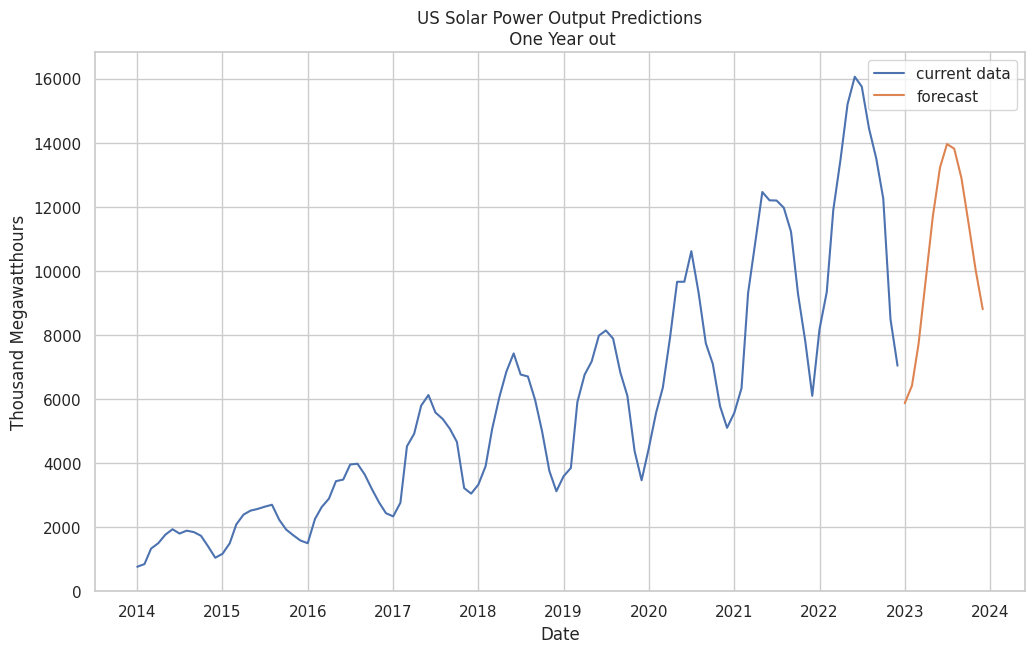

In [ ]:
#Plot our current data along with our 12 month forecast
fig, ax = plt.subplots(figsize =(12,7))
ax.plot(us_solar_df, label='current data')
ax.plot(forecast, label='forecast')

ax.set_title('US Solar Power Output Predictions\n One Year out')
ax.set_xlabel('Date')
ax.set_ylabel('Thousand Megawatthours')

plt.legend();

In [ ]:
# Get one-step ahead predictions starting from 01-01-2023 and calculate confidence intervals
onestep_pred = forecast_model.get_prediction(start= pd.to_datetime('2022-01-01'),
                                     end= pd.to_datetime('2024-01-01'),
                                     dynamic=False)

onestep_pred_conf = onestep_pred.conf_int()


# Get dynamic predictions with confidence intervals as above
pred_dynamic = forecast_model.get_prediction(start= pd.to_datetime('2022-01-01'),
                                     end= pd.to_datetime('2024-01-01'),
                                     dynamic=True,
                                     full_results=True)

pred_dynamic_conf = pred_dynamic.conf_int()

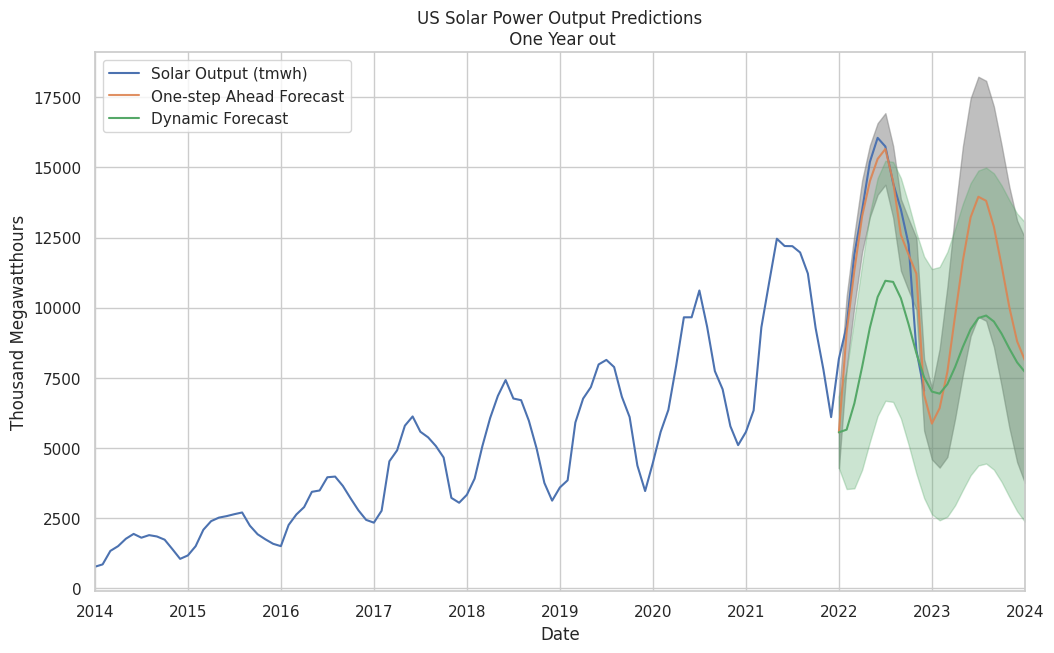

In [ ]:
# Plot real vs predicted values along with confidence interval

fig, ax = plt.subplots(figsize =(12,7))

# Plot observed values
us_solar_df.plot(label='observed', ax=ax)

# Plot one-step ahead predicted values
onestep_pred.predicted_mean.plot(ax=ax, label='One-step Ahead Forecast', alpha=0.9)

# Plot the range for one-step ahead predictions confidence intervals
ax.fill_between(onestep_pred_conf.index,
                onestep_pred_conf.iloc[:, 0],
                onestep_pred_conf.iloc[:, 1], color='grey', alpha=0.5)

# Plot the dynamic forecast with confidence intervals.
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

# Set axes labels
ax.set_title('US Solar Power Output Predictions\n One Year out')
ax.set_xlabel('Date')
ax.set_ylabel('Thousand Megawatthours')

plt.legend(loc='upper left')
plt.show()

In [ ]:
#Reset the index as we need dates in a column
prophet_df = us_solar_df.reset_index()

# Rename the columns [index, Solar Output (tmwh)] to [ds, y]
prophet_df = prophet_df.rename(columns={'index': 'ds',
                                              'Solar Output (tmwh)': 'y'})

In [ ]:
# Instantiate prophet object. Use an uncertainty interval of 95% (default is 80%)
prophet_model = Prophet(interval_width=0.95)

#Fit our prophet-formatted original data
prophet_model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiobo6u5/9ksc6ud4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiobo6u5/up5ropnv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17453', 'data', 'file=/tmp/tmppiobo6u5/9ksc6ud4.json', 'init=/tmp/tmppiobo6u5/up5ropnv.json', 'output', 'file=/tmp/tmppiobo6u5/prophet_model431q0lqb/prophet_model-20250618090837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Use make_future_dataframe() with a monthly frequency and periods = 12 for 1 year forecast
future_dates = prophet_model.make_future_dataframe(periods=12, freq='MS')
future_dates.tail(12)

,ds
108,2023-01-01
109,2023-02-01
110,2023-03-01
111,2023-04-01
112,2023-05-01
113,2023-06-01
114,2023-07-01
115,2023-08-01
116,2023-09-01
117,2023-10-01


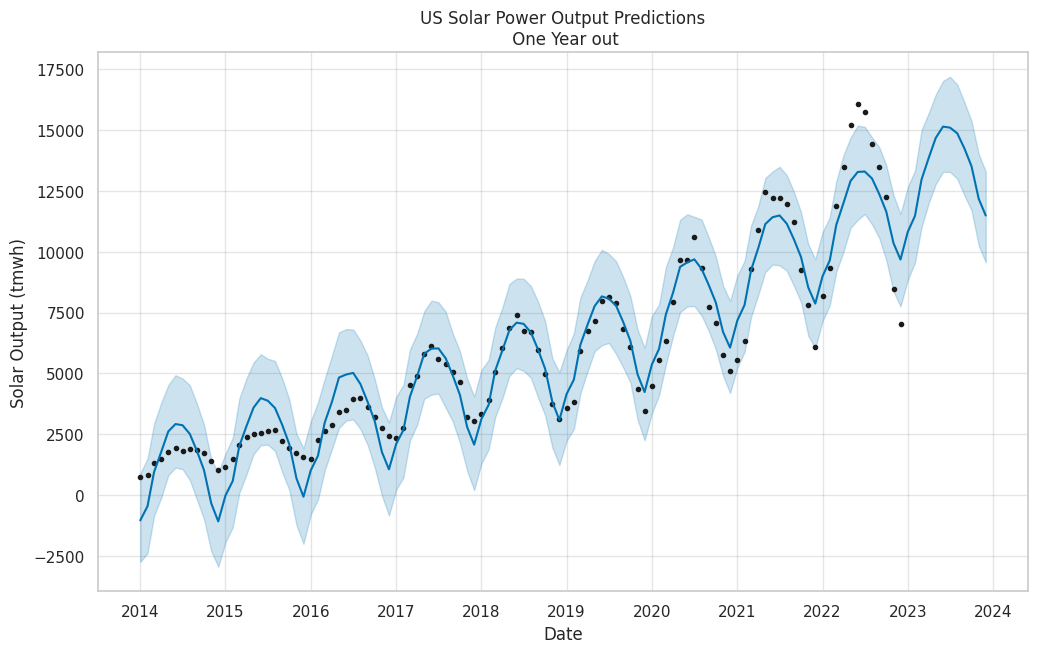

In [ ]:
# Predict the values for future dates and take the head of forecast
prophet_forecast = prophet_model.predict(future_dates)

fig, ax = plt.subplots(figsize =(12,7))

# Plot our prophet_forecast predictions
p_pred = prophet_model.plot(prophet_forecast, ax=ax, uncertainty=True,
                            xlabel='Date',
                            ylabel='Solar Output (tmwh)')


ax.set_title('US Solar Power Output Predictions\n One Year out')

plt.show()

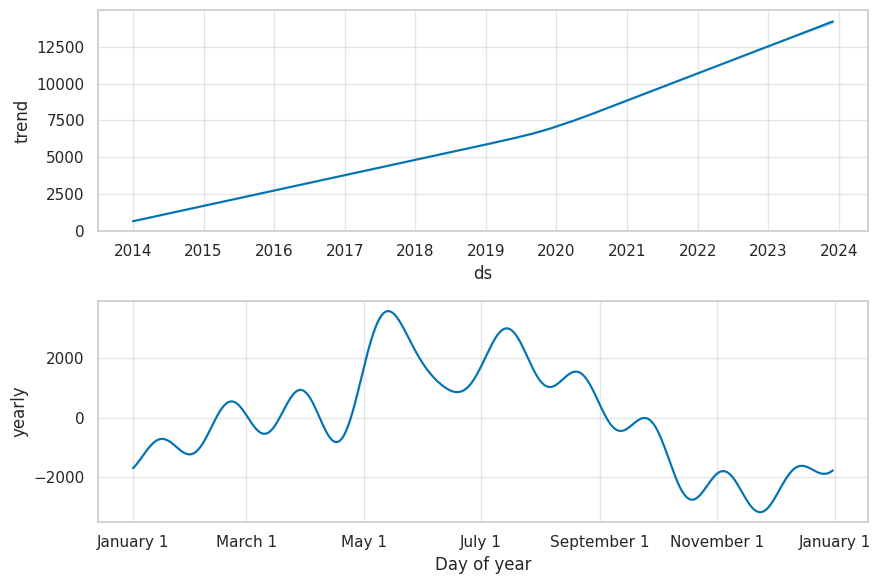

In [ ]:
# Plot model components
prophet_model.plot_components(prophet_forecast)
plt.show()